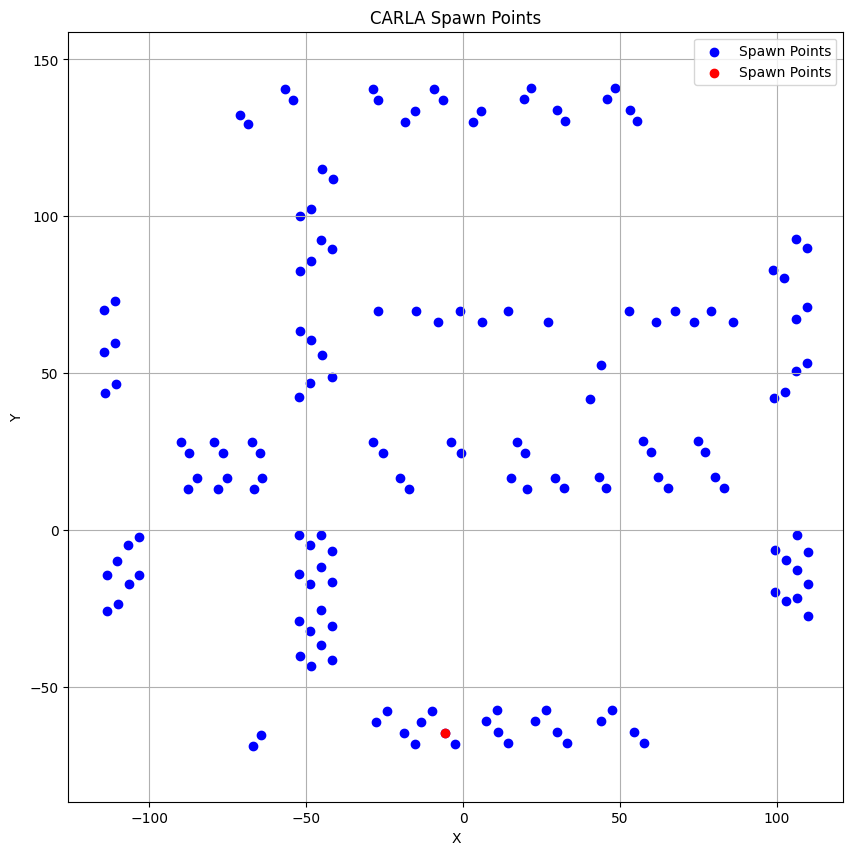

In [1]:
import carla
import matplotlib.pyplot as plt

# CARLA 서버에 연결
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 현재 월드 가져오기
world = client.get_world()

# 맵에서 스폰 포인트 가져오기
spawn_points = world.get_map().get_spawn_points()

# 스폰 포인트 좌표 추출
x_coords = [point.location.x for point in spawn_points]
y_coords = [point.location.y for point in spawn_points]

# 스폰 포인트 시각화
plt.figure(figsize=(10, 10))
plt.scatter(x_coords, y_coords, c='blue', marker='o', label='Spawn Points')
plt.scatter(x_coords[81], y_coords[81], c='red', marker='o', label='Spawn Points')
plt.title('CARLA Spawn Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()


In [2]:
import carla

# CARLA 서버에 연결
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)
world = client.get_world()

# 월드에 존재하는 모든 신호등 객체 가져오기
traffic_lights = world.get_actors().filter('traffic.traffic_light')

print("Traffic Light Positions:")
for traffic_light in traffic_lights:
    location = traffic_light.get_location()
    print(f"X: {location.x:.2f}, Y: {location.y:.2f}, Z: {location.z:.2f}")

# 모든 신호등의 위치를 시각화
for traffic_light in traffic_lights:
    location = traffic_light.get_location()
    world.debug.draw_point(location, size=0.3, color=carla.Color(255, 0, 0), life_time=5.0)


Traffic Light Positions:
X: -31.64, Y: 33.59, Z: 0.25
X: -62.10, Y: 123.76, Z: 0.28
X: -58.72, Y: 145.82, Z: 0.25
X: -119.24, Y: 19.00, Z: 0.25
X: -59.24, Y: -51.50, Z: 0.25
X: -94.93, Y: 20.33, Z: 0.25
X: -62.35, Y: 20.20, Z: 0.25
X: -64.26, Y: 7.06, Z: 0.25
X: -31.93, Y: 20.30, Z: 0.25
X: 89.79, Y: 20.92, Z: 0.25
X: 114.45, Y: 21.20, Z: 0.25
X: -34.45, Y: -51.02, Z: 0.25
X: -46.17, Y: -73.56, Z: 0.25
X: 115.45, Y: 35.04, Z: 0.22
X: -119.23, Y: 5.09, Z: 0.26


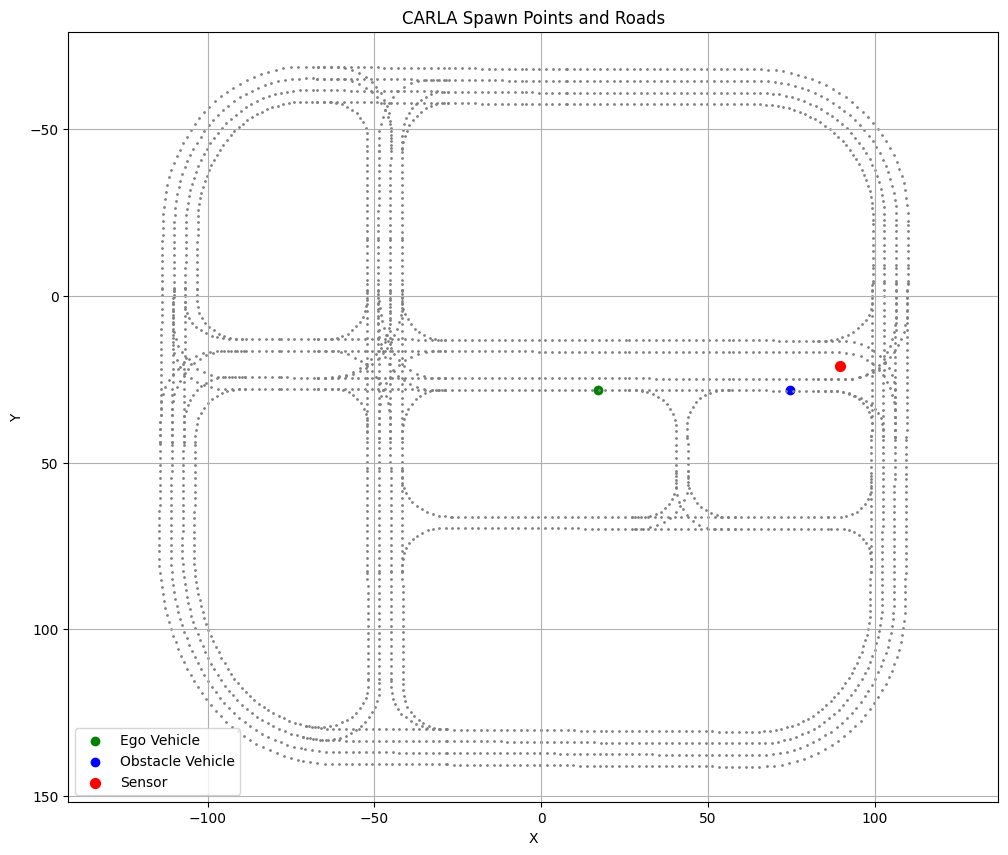

In [8]:
import carla
import numpy as np
import matplotlib.pyplot as plt

def get_spawn_points(world):
    """현재 맵에서 스폰 포인트를 가져옵니다."""
    return world.get_map().get_spawn_points()

def get_waypoints(world, distance=2.0):
    """도로의 웨이포인트를 지정된 거리 간격으로 가져옵니다."""
    map_ = world.get_map()
    waypoints = map_.generate_waypoints(distance)
    return waypoints

def plot_spawn_points_and_roads(world):
    """스폰 포인트와 도로를 시각화합니다."""
    spawn_points = get_spawn_points(world)
    waypoints = get_waypoints(world)
    
    num_spawn_points = len(spawn_points)
    colors = plt.cm.jet(np.linspace(0, 1, num_spawn_points))

    # 스폰 포인트 좌표 추출
    spawn_x = [point.location.x for point in spawn_points]
    spawn_y = [point.location.y for point in spawn_points]

    # 도로 웨이포인트 좌표 추출
    road_x = [wp.transform.location.x for wp in waypoints]
    road_y = [wp.transform.location.y for wp in waypoints]

    
    traffic_lights = world.get_actors().filter('traffic.traffic_light')

    # 신호등 위치 추출
    traffic_light_x = []
    traffic_light_y = []

    for traffic_light in traffic_lights:
        location = traffic_light.get_location()
        traffic_light_x.append(location.x)
        traffic_light_y.append(location.y)
    
    
    
    # 시각화
    plt.figure(figsize=(12, 10))

    # Ego vehicle start
    ego_idx = 57
    plt.scatter(spawn_x[ego_idx], spawn_y[ego_idx], c='green', marker='o', label='Ego Vehicle')
    
    
    # Obstacle vehicle start
    obs_idx = 59
    plt.scatter(spawn_x[obs_idx], spawn_y[obs_idx], c='blue', marker='o', label='Obstacle Vehicle')

#     # 스폰 포인트 인덱스 텍스트 추가
#     for idx, (x, y) in enumerate(zip(spawn_x, spawn_y)):
        
#         plt.text(x, y, str(idx), fontsize=8, ha='right', va='bottom', color='black')

    # for idx, (x, y) in enumerate(zip(traffic_light_x, traffic_light_y)):
    #     plt.text(x, y, str(idx), fontsize=8, ha='right', va='bottom', color='black')

        
    # plt.scatter(spawn_x[81], spawn_y[81], c='red', marker='o', label='Obs Spawn Points')
    # plt.scatter(spawn_x[101], spawn_y[101], c='yellow', marker='o', label='Ego Spawn Points')
    plt.scatter(road_x, road_y, c='gray', s=1)
    
    plt.scatter(traffic_light_x[9], traffic_light_y[9], c='red', label='Sensor', s=50)

    
    plt.title('CARLA Spawn Points and Roads')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

# CARLA 서버에 연결
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 현재 월드 가져오기
world = client.get_world()

# 시각화 실행
plot_spawn_points_and_roads(world)


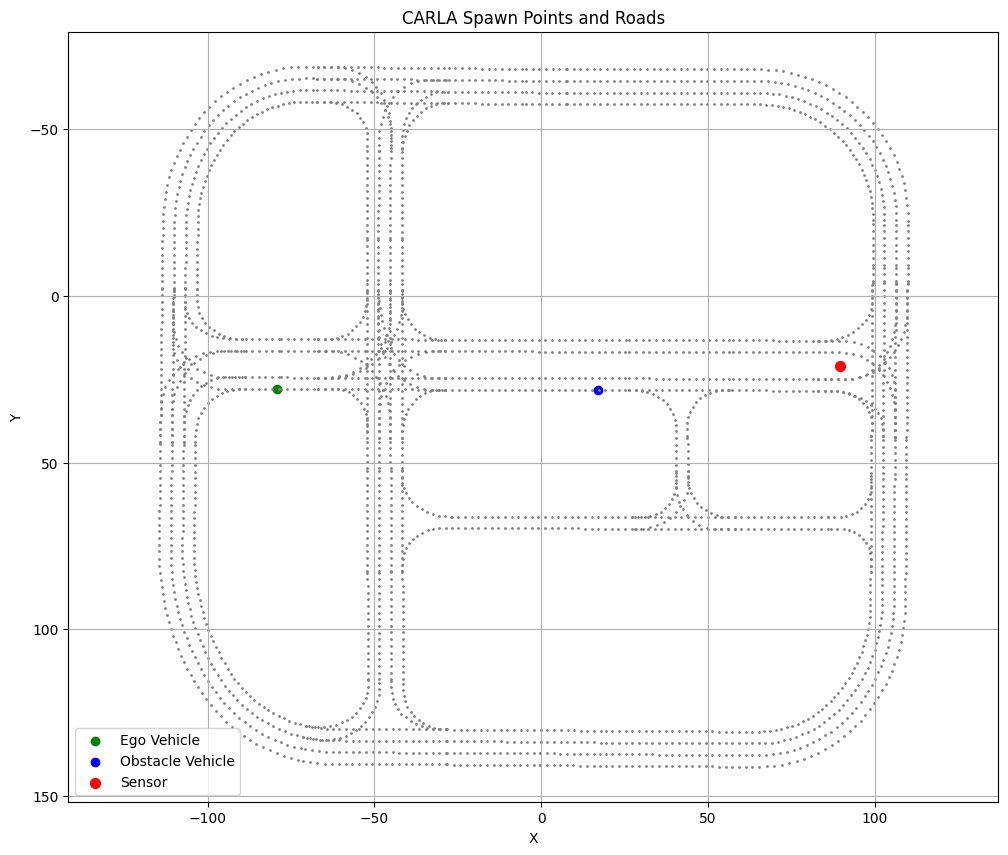

In [10]:
import carla
import numpy as np
import matplotlib.pyplot as plt

def get_spawn_points(world):
    """현재 맵에서 스폰 포인트를 가져옵니다."""
    return world.get_map().get_spawn_points()

def get_waypoints(world, distance=2.0):
    """도로의 웨이포인트를 지정된 거리 간격으로 가져옵니다."""
    map_ = world.get_map()
    waypoints = map_.generate_waypoints(distance)
    return waypoints

def plot_spawn_points_and_roads(world):
    """스폰 포인트와 도로를 시각화합니다."""
    spawn_points = get_spawn_points(world)
    waypoints = get_waypoints(world)
    
    num_spawn_points = len(spawn_points)
    colors = plt.cm.jet(np.linspace(0, 1, num_spawn_points))

    # 스폰 포인트 좌표 추출
    spawn_x = [point.location.x for point in spawn_points]
    spawn_y = [point.location.y for point in spawn_points]

    # 도로 웨이포인트 좌표 추출
    road_x = [wp.transform.location.x for wp in waypoints]
    road_y = [wp.transform.location.y for wp in waypoints]

    
    traffic_lights = world.get_actors().filter('traffic.traffic_light')

    # 신호등 위치 추출
    traffic_light_x = []
    traffic_light_y = []

    for traffic_light in traffic_lights:
        location = traffic_light.get_location()
        traffic_light_x.append(location.x)
        traffic_light_y.append(location.y)
    
    
    
    # 시각화
    plt.figure(figsize=(12, 10))

    # Ego vehicle start
    ego_idx = 94
    plt.scatter(spawn_x[ego_idx], spawn_y[ego_idx], c='green', marker='o', label='Ego Vehicle')
    
    
    # Obstacle vehicle start
    obs_idx = 57
    plt.scatter(spawn_x[obs_idx], spawn_y[obs_idx], c='blue', marker='o', label='Obstacle Vehicle')

#     # 스폰 포인트 인덱스 텍스트 추가
#     for idx, (x, y) in enumerate(zip(spawn_x, spawn_y)):
        
#         plt.text(x, y, str(idx), fontsize=8, ha='right', va='bottom', color='black')

    # for idx, (x, y) in enumerate(zip(traffic_light_x, traffic_light_y)):
    #     plt.text(x, y, str(idx), fontsize=8, ha='right', va='bottom', color='black')

        
    # plt.scatter(spawn_x[81], spawn_y[81], c='red', marker='o', label='Obs Spawn Points')
    # plt.scatter(spawn_x[101], spawn_y[101], c='yellow', marker='o', label='Ego Spawn Points')
    plt.scatter(road_x, road_y, c='gray', s=1)
    
    plt.scatter(traffic_light_x[9], traffic_light_y[9], c='red', label='Sensor', s=50)

    
    plt.title('CARLA Spawn Points and Roads')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.legend()
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.show()

# CARLA 서버에 연결
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 현재 월드 가져오기
world = client.get_world()

# 시각화 실행
plot_spawn_points_and_roads(world)


In [11]:
import carla

# CARLA 서버에 연결
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)
world = client.get_world()

# Blueprint 가져오기
blueprint_library = world.get_blueprint_library()
vehicle_bp = blueprint_library.filter('vehicle.*')[0]  # 랜덤 차량 선택

# 117번 스폰 포인트 가져오기
spawn_points = world.get_map().get_spawn_points()
for i in [57, 59]:
    spawn_point = spawn_points[i]
    vehicle = world.spawn_actor(vehicle_bp, spawn_point)


In [12]:
!pwd
!export PYTHONPATH=$PYTHONPATH:$(pwd)/evidential-learning-pytorch

import sys
print(sys.path)
sys.path.append('/work/DRO-EDL/1d/evidential-learning-pytorch')

from tqdm import tqdm
from scipy.stats import norm

import numpy as np
from scipy.stats import norm, invgamma

import matplotlib.pyplot as plt
from scipy.special import gamma
from scipy.optimize import minimize
from scipy.integrate import dblquad

import torch

from torch import nn
from torch.utils.data import DataLoader, TensorDataset

from edl_pytorch import NormalInvGamma, evidential_regression

import torch.optim as optim
from IPython.display import clear_output


/work/DRO-EDL
['/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/opencda/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages']


In [13]:
def cart2polar(x,y):
    r = (x**2 + y**2)**(1/2)
    theta = np.arccos(x/r)
    return r , theta

def polar2cart(r,theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x,y

In [14]:
model = nn.Sequential(
    nn.Linear(2, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    NormalInvGamma(64, 1),
)
model.load_state_dict(torch.load(f'1d/uncertain_weights/{20}.pth'))

<All keys matched successfully>

In [16]:
epsilon = 0.95
target_cdf = 0.90
kappa = norm.pdf(norm.ppf(epsilon))/(1-epsilon)
import pickle

with open(f'1d/a_memory_set/a_memory_{target_cdf}.pickle', 'rb') as fr:
    a_memory = pickle.load(fr)

In [20]:
def update(d):
    with torch.no_grad():
        pred = model(torch.tensor(cart2polar(d,10), dtype=torch.float))
    
    mu_0, lambda_, alpha, beta = (d.squeeze() for d in pred)
    print(mu_0, lambda_, alpha, beta)
    mu_0 = mu_0
    data_var = beta*(1+lambda_)/(lambda_*alpha)
    l = np.linspace(mu_0-200, mu_0+200, 1000)
    dist = norm(mu_0,np.sqrt(data_var))
    plt.plot(l, dist.pdf(l))
    print("d: ",d)
    plt.scatter(d, 0, marker='o', color='g', s=200, label=f'ground truth: {d:.02f}', alpha=0.5)
    plt.scatter(mu_0, 0, marker='o', color='r', s=200, label=f'prediction: {mu_0:.02f}', alpha=0.5)

    CVaR = mu_0 - kappa * np.sqrt(data_var)
    plt.axvline(x=CVaR, color='orange', label=f'EDL_CVaR: {CVaR:.02f}')
    print(float(f'{alpha:.03f}'))
    if float(f'{alpha:.03f}') == 1.0:
        alpha = 1.001
    elif alpha < 1.001:
        print("no...", alpha)
    zx, zy = a_memory[float(f'{alpha:.02f}')]
    print("zx, zy: ",zx, zy)
    mu, sigma2 = mu_0 - zx / np.sqrt(lambda_/beta), zy * beta
    print("solution: ",mu, sigma2)
    DR_EDL_CVaR = mu - kappa * np.sqrt(sigma2)
    plt.axvline(x=DR_EDL_CVaR, color='blue', label=f'DR_EDL_CVaR: {DR_EDL_CVaR:.02f}')
    
    plt.axvspan(-50, 50, color='green', alpha=0.1)
    plt.xlim(-200, 100)
    plt.ylim(0,1)
    plt.grid(True)
    plt.legend()
    plt.title(f"CDF: {target_cdf}, epsilon: {epsilon}")
    plt.show()
import ipywidgets as widgets

x_slider = widgets.FloatSlider(value=2, min=-100, max=100, step=1, description='x')
ui = widgets.VBox([x_slider])
out = widgets.interactive_output(update, {
    'd': x_slider, 
})

display(ui, out)

Output()

In [40]:
def update(x):
    with torch.no_grad():
        pred = model(torch.tensor(cart2polar(x-89.79,7.184190826416014), dtype=torch.float))
    
    mu_0, lambda_, alpha, beta = (d.squeeze() for d in pred)
    print(mu_0, lambda_, alpha, beta)
    mu_0 = 89.79 + mu_0
    data_var = beta*(1+lambda_)/(lambda_*alpha)
    l = np.linspace(mu_0-200, mu_0+200, 1000)
    dist = norm(mu_0,np.sqrt(data_var))
    plt.plot(l, dist.pdf(l))
    plt.scatter(x, 0, marker='o', color='g', s=200, label=f'ground truth: {x:.02f}', alpha=0.5)
    plt.scatter(mu_0, 0, marker='o', color='r', s=200, label=f'prediction: {mu_0:.02f}', alpha=0.5)

    CVaR = mu_0 - kappa * np.sqrt(data_var)
    plt.axvline(x=CVaR, color='orange', label=f'CVaR: {CVaR:.02f}')
    print(float(f'{alpha:.03f}'))
    if float(f'{alpha:.03f}') == 1.0:
        alpha = 1.001
    zx, zy = a_memory[float(f'{alpha:.02f}')]
    print("zx, zy: ",zx, zy)
    mu, sigma2 = mu_0 - zx / np.sqrt(lambda_/beta), zy * beta
    print("solution: ",mu, sigma2)
    DR_EDL_CVaR = mu - kappa * np.sqrt(sigma2)
    plt.axvline(x=DR_EDL_CVaR, color='blue', label=f'DR_EDL_CVaR: {DR_EDL_CVaR:.02f}')
    
    plt.xlim(-200, 100)
    plt.ylim(0,1)
    plt.grid(True)
    plt.legend()
    plt.show()

import ipywidgets as widgets

x_slider = widgets.FloatSlider(value=2, min=-100, max=100, step=1, description='x')
ui = widgets.VBox([x_slider])
out = widgets.interactive_output(update, {
    'x': x_slider, 
})

display(ui, out)

Output()

In [50]:
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 월드 가져오기
world = client.get_world()
actors = world.get_actors()#.filter('vehicle.*')
print(actors)
for actor in actors:
    print(actor.get_location())
    # if actor.get_location().x < 0:
    actor.destroy()


[]


In [ ]:
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 월드 가져오기
world = client.get_world()

In [42]:
vehicle.get_transform().location.x

74.79912567138672

In [43]:
from carla import ColorConverter as cc
bp = world.get_blueprint_library().find('sensor.camera.rgb')

bp.set_attribute('image_size_x', '400')
bp.set_attribute('image_size_y', '300')
bp.set_attribute('fov', '90')

Attachment = carla.AttachmentType
transform = carla.Transform(carla.Location(x=+1, y=-10, z=0.5))
sensor = world.spawn_actor(bp, transform, attach_to=vehicle, attachment_type=Attachment.Rigid)

In [47]:
sensor.listen(lambda image: image)

In [48]:
sensor[1]

TypeError: 'ServerSideSensor' object is not subscriptable

tensor(-17.4034) tensor(0.1394) tensor(2.2879) tensor(0.2270)
cx:  74.79911041259766 std:  tensor(0.8107) world pos:  tensor(72.3866)
cx:  74.79911041259766 CVaR:  tensor(70.5293)
tensor(-36.9820) tensor(5.0316e-06) tensor(2.1582) tensor(0.0062)
cx:  17.091604232788086 std:  tensor(569.9313) world pos:  tensor(52.8080)
cx:  17.091604232788086 CVaR:  tensor(3.5644)


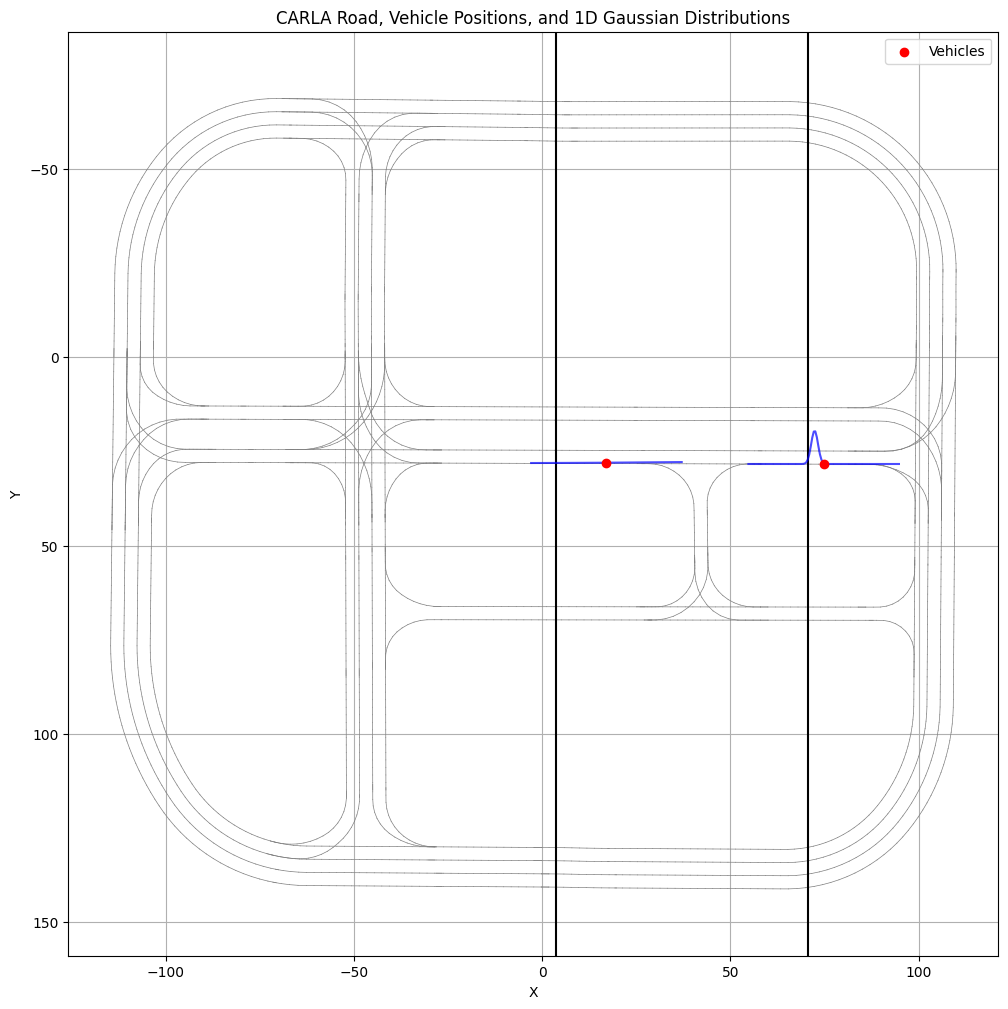

In [16]:
import carla
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
epsilon = 0.95
kappa = norm.pdf(norm.ppf(epsilon))/(1-epsilon)
# CARLA 클라이언트 초기화
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 월드 가져오기
world = client.get_world()
map = world.get_map()

# 도로 waypoint 가져오기
waypoints = map.generate_waypoints(2.0)  # 2m 간격으로 생성
road_segments = []
for waypoint in waypoints:
    location = waypoint.transform.location
    next_waypoints = waypoint.next(2.0)
    for next_wp in next_waypoints:
        next_location = next_wp.transform.location
        road_segments.append(((location.x, location.y), (next_location.x, next_location.y)))

# 자동차 위치 가져오기
actors = world.get_actors().filter('vehicle.*')
vehicle_locations = [actor.get_location() for actor in actors]

# Waypoint와 자동차 위치 분리
car_x = [loc.x for loc in vehicle_locations]
car_y = [loc.y for loc in vehicle_locations]

# 정규분포 매개변수
std_dev = 1.0  # 표준편차
x_range = 20  # x축 정규분포 범위
num_points = 100

# 플롯 그리기
plt.figure(figsize=(12, 12))

# 도로 선 그리기
for segment in road_segments:
    (x1, y1), (x2, y2) = segment
    plt.plot([x1, x2], [y1, y2], 'gray', linewidth=0.5)

# 차량 정규분포 및 위치 그리기
for cx, cy in zip(car_x, car_y):

    with torch.no_grad():
        pred = model(torch.tensor(cart2polar(cx-89.79,7.184190826416014), dtype=torch.float))
    
    mu_0, lambda_, alpha, beta = (d.squeeze() for d in pred)
    print(mu_0, lambda_, alpha, beta)
    mu_0 = 89.79 + mu_0
    data_var = beta*(1+lambda_)/(lambda_*alpha)
    print("cx: ",cx, "std: ",data_var, 'world pos: ', mu_0)
    # 1D 정규분포 계산
    x = np.linspace(cx - x_range, cx + x_range, num_points)
    y = norm.pdf(x, loc=mu_0, scale=np.sqrt(data_var))  # 1D 정규분포
    
    CVaR = mu_0 - kappa * np.sqrt(data_var)
    print("cx: ",cx, "CVaR: ",CVaR)
    plt.axvline(x=CVaR, color='k')
    y_scaled = -y * x_range + cy  # y축 위치 조정 (자동차 위치 위로 이동)
    

    # 정규분포 그리기
    plt.plot(x, y_scaled, color='blue', alpha=0.7)

# 차량 위치 그리기
plt.scatter(car_x, car_y, c='red', label='Vehicles', zorder=5)

# 그래프 설정
plt.title('CARLA Road, Vehicle Positions, and 1D Gaussian Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


tensor(-17.4034) tensor(0.1394) tensor(2.2879) tensor(0.2270)
cx:  74.79911041259766 std:  tensor(0.8107) world pos:  tensor(72.3866)
cx:  74.79911041259766 CVaR:  tensor(70.5293)
tensor(-36.9820) tensor(5.0316e-06) tensor(2.1582) tensor(0.0062)
cx:  17.091604232788086 std:  tensor(569.9313) world pos:  tensor(52.8080)
cx:  17.091604232788086 CVaR:  tensor(3.5644)


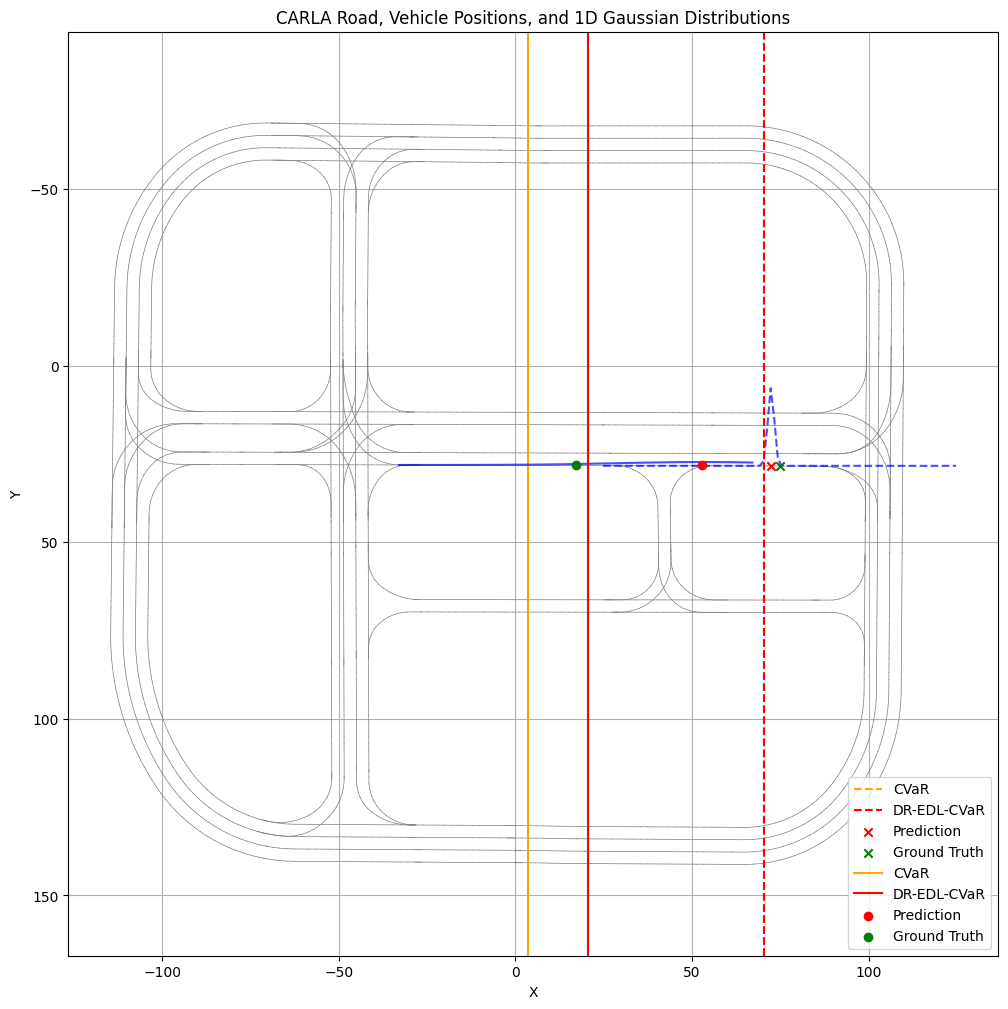

In [17]:
import carla
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
epsilon = 0.95
kappa = norm.pdf(norm.ppf(epsilon))/(1-epsilon)
# CARLA 클라이언트 초기화
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 월드 가져오기
world = client.get_world()
map = world.get_map()

# 도로 waypoint 가져오기
waypoints = map.generate_waypoints(2.0)  # 2m 간격으로 생성
road_segments = []
for waypoint in waypoints:
    location = waypoint.transform.location
    next_waypoints = waypoint.next(2.0)
    for next_wp in next_waypoints:
        next_location = next_wp.transform.location
        road_segments.append(((location.x, location.y), (next_location.x, next_location.y)))

# 자동차 위치 가져오기
actors = world.get_actors().filter('vehicle.*')
vehicle_locations = [actor.get_location() for actor in actors]

# Waypoint와 자동차 위치 분리
car_x = [loc.x for loc in vehicle_locations]
car_y = [loc.y for loc in vehicle_locations]

# 정규분포 매개변수
std_dev = 1.0  # 표준편차
x_range = 50  # x축 정규분포 범위
num_points = 100

# 플롯 그리기
plt.figure(figsize=(12, 12))

# 도로 선 그리기
for segment in road_segments:
    (x1, y1), (x2, y2) = segment
    plt.plot([x1, x2], [y1, y2], 'gray', linewidth=0.5)

marker = ['x', 'o']
linestyle = ['--', '-']
# 차량 정규분포 및 위치 그리기
for i, (cx, cy) in enumerate(zip(car_x, car_y)):

    with torch.no_grad():
        pred = model(torch.tensor(cart2polar(cx-89.79,7.184190826416014), dtype=torch.float))
    
    mu_0, lambda_, alpha, beta = (d.squeeze() for d in pred)
    print(mu_0, lambda_, alpha, beta)
    mu_0 = 89.79 + mu_0
    data_var = beta*(1+lambda_)/(lambda_*alpha)
    print("cx: ",cx, "std: ",data_var, 'world pos: ', mu_0)
    # 1D 정규분포 계산
    x = np.linspace(cx - x_range, cx + x_range, num_points)
    y = norm.pdf(x, loc=mu_0, scale=np.sqrt(data_var))  # 1D 정규분포
    
    CVaR = mu_0 - kappa * np.sqrt(data_var)
    print("cx: ",cx, "CVaR: ",CVaR)
    plt.axvline(x=CVaR, color='orange', linestyle=linestyle[i], label='CVaR')
    y_scaled = -y * x_range + cy  # y축 위치 조정 (자동차 위치 위로 이동)
    # 정규분포 그리기
    plt.plot(x, y_scaled, color='blue', alpha=0.7, linestyle=linestyle[i])

    zx, zy = a_memory[float(f'{alpha:.02f}')]
    mu, sigma2 = mu_0 - zx / np.sqrt(lambda_/beta), zy * beta
    DR_EDL_CVaR = mu - kappa * np.sqrt(sigma2)
    plt.axvline(x=DR_EDL_CVaR, color='r', linestyle=linestyle[i], label='DR-EDL-CVaR')
    plt.scatter(mu_0, cy, c='r', label='Prediction', zorder=5, marker=marker[i])
    plt.scatter(cx, cy, c='g', label='Ground Truth', zorder=5, marker=marker[i])
    
    
# 차량 위치 그리기

# Predicted location

# 그래프 설정
plt.title('CARLA Road, Vehicle Positions, and 1D Gaussian Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


tensor(-17.4034) tensor(0.1394) tensor(2.2879) tensor(0.2270)
cx:  74.79915618896484 std:  tensor(0.8107) world pos:  tensor(72.3866)
cx:  74.79915618896484 CVaR:  tensor(70.5293)
tensor(-36.9820) tensor(5.0316e-06) tensor(2.1582) tensor(0.0062)
cx:  17.091638565063477 std:  tensor(569.9268) world pos:  tensor(52.8080)
cx:  17.091638565063477 CVaR:  tensor(3.5646)


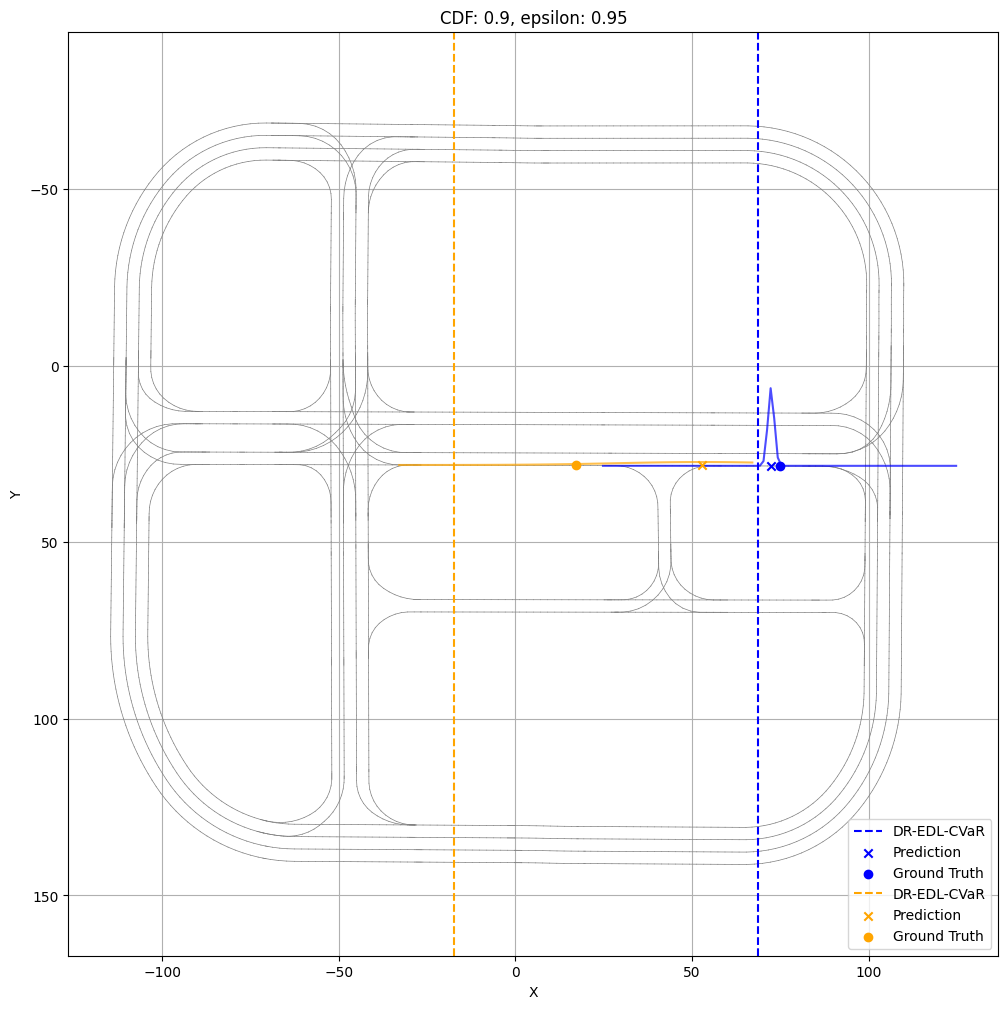

In [51]:
import carla
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
epsilon = 0.95
kappa = norm.pdf(norm.ppf(epsilon))/(1-epsilon)
# CARLA 클라이언트 초기화
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)

# 월드 가져오기
world = client.get_world()
map = world.get_map()

# 도로 waypoint 가져오기
waypoints = map.generate_waypoints(2.0)  # 2m 간격으로 생성
road_segments = []
for waypoint in waypoints:
    location = waypoint.transform.location
    next_waypoints = waypoint.next(2.0)
    for next_wp in next_waypoints:
        next_location = next_wp.transform.location
        road_segments.append(((location.x, location.y), (next_location.x, next_location.y)))

# 자동차 위치 가져오기
actors = world.get_actors().filter('vehicle.*')
vehicle_locations = [actor.get_location() for actor in actors]

# Waypoint와 자동차 위치 분리
car_x = [loc.x for loc in vehicle_locations]
car_y = [loc.y for loc in vehicle_locations]

# 정규분포 매개변수
std_dev = 1.0  # 표준편차
x_range = 50  # x축 정규분포 범위
num_points = 100

# 플롯 그리기
plt.figure(figsize=(12, 12))

# 도로 선 그리기
for segment in road_segments:
    (x1, y1), (x2, y2) = segment
    plt.plot([x1, x2], [y1, y2], 'gray', linewidth=0.5)
    
target_cdf = 0.90
with open(f'1d/a_memory_set/a_memory_{target_cdf}.pickle', 'rb') as fr:
    a_memory = pickle.load(fr)
marker = ['x', 'o']
linestyle = ['--', '-']
color = ['b', 'orange']
# 차량 정규분포 및 위치 그리기
for i, (cx, cy) in enumerate(zip(car_x, car_y)):

    with torch.no_grad():
        pred = model(torch.tensor(cart2polar(cx-89.79,7.184190826416014), dtype=torch.float))
    
    mu_0, lambda_, alpha, beta = (d.squeeze() for d in pred)
    print(mu_0, lambda_, alpha, beta)
    mu_0 = 89.79 + mu_0
    data_var = beta*(1+lambda_)/(lambda_*alpha)
    print("cx: ",cx, "std: ",data_var, 'world pos: ', mu_0)
    # 1D 정규분포 계산
    x = np.linspace(cx - x_range, cx + x_range, num_points)
    y = norm.pdf(x, loc=mu_0, scale=np.sqrt(data_var))  # 1D 정규분포
    
    CVaR = mu_0 - kappa * np.sqrt(data_var)
    print("cx: ",cx, "CVaR: ",CVaR)
    # plt.axvline(x=CVaR, color='orange', linestyle=linestyle[i], label='CVaR')
    y_scaled = -y * x_range + cy  # y축 위치 조정 (자동차 위치 위로 이동)
    # 정규분포 그리기
    plt.plot(x, y_scaled, color=color[i], alpha=0.7, linestyle='-')

    zx, zy = a_memory[float(f'{alpha:.02f}')]
    mu, sigma2 = mu_0 - zx / np.sqrt(lambda_/beta), zy * beta
    DR_EDL_CVaR = mu - kappa * np.sqrt(sigma2)
    plt.axvline(x=DR_EDL_CVaR, color=color[i], linestyle='--', label='DR-EDL-CVaR')
    plt.scatter(mu_0, cy, c=color[i], label='Prediction', zorder=5, marker='x')
    plt.scatter(cx, cy, c=color[i], label='Ground Truth', zorder=5, marker='o')
    
    
# 차량 위치 그리기

# Predicted location

# 그래프 설정
plt.title(f'CDF: {target_cdf}, epsilon: {epsilon}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


In [35]:
for i in range(100, 0, -1):
    print(i)

100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [44]:
target_cdf = 0.50
with open(f'1d/a_memory_set/a_memory_{target_cdf}.pickle', 'rb') as fr:
    a_memory = pickle.load(fr)
frame = 0
tot = [x for x in range(0,100, 3)] + [x for x in range(100, -200, -3)] + [x for x in range(-200,100, 3)]
for d in tqdm(tot):
    with torch.no_grad():
        pred = model(torch.tensor(cart2polar(d,10), dtype=torch.float))
    
    mu_0, lambda_, alpha, beta = (d.squeeze() for d in pred)
    print(mu_0, lambda_, alpha, beta)
    mu_0 = mu_0
    data_var = beta*(1+lambda_)/(lambda_*alpha)
    l = np.linspace(mu_0-200, mu_0+200, 1000)
    dist = norm(mu_0,np.sqrt(data_var))
    plt.plot(l, dist.pdf(l))
    print("d: ",d)
    plt.scatter(d, 0, marker='o', color='g', s=200, label=f'ground truth: {d:.02f}', alpha=0.5)
    plt.scatter(mu_0, 0, marker='o', color='r', s=200, label=f'prediction: {mu_0:.02f}', alpha=0.5)

    CVaR = mu_0 - kappa * np.sqrt(data_var)
    plt.axvline(x=CVaR, color='orange', label=f'EDL_CVaR: {CVaR:.02f}')
    print(float(f'{alpha:.03f}'))
    if float(f'{alpha:.03f}') == 1.0:
        alpha = 1.001
    elif alpha < 1.001:
        print("no...", alpha)
    zx, zy = a_memory[float(f'{alpha:.02f}')]
    print("zx, zy: ",zx, zy)
    mu, sigma2 = mu_0 - zx / np.sqrt(lambda_/beta), zy * beta
    print("solution: ",mu, sigma2)
    DR_EDL_CVaR = mu - kappa * np.sqrt(sigma2)
    plt.axvline(x=DR_EDL_CVaR, color='blue', label=f'DR_EDL_CVaR: {DR_EDL_CVaR:.02f}')
    
    plt.axvspan(-50, 50, color='green', alpha=0.1)
    plt.xlim(-200, 100)
    plt.ylim(0,1)
    plt.grid(True)
    plt.legend()
    plt.title(f"CDF: {target_cdf}, epsilon: {epsilon}")
    plt.savefig(f'cdf 50 sensor inference/{frame:03d}.png')
    plt.close()
    frame+=1

  0%|▋                                                                                                                                                                             | 1/234 [00:00<00:26,  8.90it/s]

tensor(1.0405) tensor(0.1320) tensor(1.7781) tensor(0.2736)
d:  0
1.778
zx, zy:  1.015925157070543 0.8930353209423523
solution:  tensor(-0.4221) tensor(0.2444)
tensor(2.9599) tensor(0.1253) tensor(1.8339) tensor(0.2413)
d:  3
1.834
zx, zy:  1.0038588237849342 0.8688794179615779
solution:  tensor(1.5671) tensor(0.2096)


  1%|██▏                                                                                                                                                                           | 3/234 [00:00<00:25,  9.03it/s]

tensor(4.8625) tensor(0.1029) tensor(1.8870) tensor(0.2004)
d:  6
1.887
zx, zy:  0.9819112701946048 0.8345622704636702
solution:  tensor(3.4920) tensor(0.1673)
tensor(8.3438) tensor(0.0808) tensor(1.9687) tensor(0.1439)
d:  9
1.969
zx, zy:  0.966489916005338 0.802518804620554
solution:  tensor(7.0542) tensor(0.1154)


  2%|███▋                                                                                                                                                                          | 5/234 [00:00<00:24,  9.27it/s]

tensor(11.8121) tensor(0.0584) tensor(2.0543) tensor(0.0993)
d:  12
2.054
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(10.5781) tensor(0.0763)
tensor(15.3976) tensor(0.0409) tensor(2.1493) tensor(0.0672)
d:  15
2.149
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(14.2286) tensor(0.0485)


  3%|█████▏                                                                                                                                                                        | 7/234 [00:00<00:24,  9.44it/s]

tensor(18.6475) tensor(0.0272) tensor(2.2588) tensor(0.0461)
d:  18
2.259
zx, zy:  0.8832669819644693 0.6794317849151048
solution:  tensor(17.4966) tensor(0.0313)
tensor(21.7558) tensor(0.0174) tensor(2.3656) tensor(0.0313)
d:  21
2.366
zx, zy:  0.8713025083060599 0.6519161789162833
solution:  tensor(20.5863) tensor(0.0204)


  4%|██████▋                                                                                                                                                                       | 9/234 [00:00<00:23,  9.41it/s]

tensor(24.7746) tensor(0.0108) tensor(2.4679) tensor(0.0210)
d:  24
2.468
zx, zy:  0.8508736668353649 0.6220330839626841
solution:  tensor(23.5896) tensor(0.0131)
tensor(27.7122) tensor(0.0067) tensor(2.5619) tensor(0.0140)
d:  27
2.562
zx, zy:  0.825008024004594 0.5919158106621969
solution:  tensor(26.5166) tensor(0.0083)


  5%|████████▏                                                                                                                                                                    | 11/234 [00:01<00:23,  9.36it/s]

tensor(30.6055) tensor(0.0040) tensor(2.6556) tensor(0.0093)
d:  30
2.656
zx, zy:  0.8155278341566622 0.5719382413540911
solution:  tensor(29.3699) tensor(0.0053)
tensor(33.4646) tensor(0.0024) tensor(2.7494) tensor(0.0061)
d:  33
2.749
zx, zy:  0.783700464621191 0.5412856393785904
solution:  tensor(32.2187) tensor(0.0033)


  6%|█████████▌                                                                                                                                                                   | 13/234 [00:01<00:24,  9.05it/s]

tensor(36.2971) tensor(0.0014) tensor(2.8435) tensor(0.0040)
d:  36
2.843
zx, zy:  0.778938836325871 0.5273897318524509
solution:  tensor(34.9940) tensor(0.0021)
tensor(39.1083) tensor(0.0009) tensor(2.9379) tensor(0.0027)
d:  39
2.938
zx, zy:  0.7771830095513581 0.5145517108006017
solution:  tensor(37.7372) tensor(0.0014)


  6%|███████████                                                                                                                                                                  | 15/234 [00:01<00:23,  9.31it/s]

tensor(41.9024) tensor(0.0005) tensor(3.0328) tensor(0.0017)
d:  42
3.033
zx, zy:  0.7632753251445028 0.496930706490623
solution:  tensor(40.4798) tensor(0.0009)
tensor(44.6826) tensor(0.0003) tensor(3.1281) tensor(0.0011)
d:  45
3.128
zx, zy:  0.7573265135092829 0.4831302733807832
solution:  tensor(43.1891) tensor(0.0006)


  7%|████████████▌                                                                                                                                                                | 17/234 [00:01<00:24,  9.04it/s]

tensor(47.3946) tensor(0.0002) tensor(3.2212) tensor(0.0008)
d:  48
3.221
zx, zy:  0.7430511214886407 0.4667651700151088
solution:  tensor(45.8382) tensor(0.0004)
tensor(49.1327) tensor(0.0001) tensor(3.2629) tensor(0.0005)
d:  51
3.263
zx, zy:  0.7356298973756383 0.4591930388683612
solution:  tensor(47.4680) tensor(0.0002)


  8%|██████████████                                                                                                                                                               | 19/234 [00:02<00:23,  9.25it/s]

tensor(50.1978) tensor(6.0014e-05) tensor(3.3162) tensor(0.0004)
d:  54
3.316
zx, zy:  0.7248776845455797 0.44829965176590447
solution:  tensor(48.3743) tensor(0.0002)
tensor(51.2302) tensor(3.5761e-05) tensor(3.3689) tensor(0.0003)
d:  57
3.369
zx, zy:  0.7144513199707933 0.4387780540672716
solution:  tensor(49.2294) tensor(0.0001)


  9%|███████████████▌                                                                                                                                                             | 21/234 [00:02<00:22,  9.46it/s]

tensor(52.2346) tensor(2.1285e-05) tensor(3.4209) tensor(0.0002)
d:  60
3.421
zx, zy:  0.7079346510284131 0.4313003684643554
solution:  tensor(50.0248) tensor(8.9441e-05)
tensor(53.2149) tensor(1.2656e-05) tensor(3.4724) tensor(0.0002)
d:  63
3.472
zx, zy:  0.7043706148321 0.42533496646894675
solution:  tensor(50.7616) tensor(6.5299e-05)


 10%|█████████████████                                                                                                                                                            | 23/234 [00:02<00:22,  9.41it/s]

tensor(54.1742) tensor(7.5189e-06) tensor(3.5236) tensor(0.0001)
d:  66
3.524
zx, zy:  0.6921601667244629 0.4156239708557335
solution:  tensor(51.4817) tensor(4.7287e-05)
tensor(55.1153) tensor(4.4637e-06) tensor(3.5743) tensor(8.4388e-05)
d:  69
3.574
zx, zy:  0.6846932525462059 0.4082418390013876
solution:  tensor(52.1382) tensor(3.4451e-05)


 11%|██████████████████▍                                                                                                                                                          | 25/234 [00:02<00:22,  9.49it/s]

tensor(56.0402) tensor(2.6481e-06) tensor(3.6248) tensor(6.2642e-05)
d:  72
3.625
zx, zy:  0.6894740902583637 0.4063340321408331
solution:  tensor(52.6869) tensor(2.5454e-05)
tensor(56.9510) tensor(1.5701e-06) tensor(3.6750) tensor(4.6532e-05)
d:  75
3.675
zx, zy:  0.6705668559428225 0.3943179940337075
solution:  tensor(53.3006) tensor(1.8348e-05)


 12%|███████████████████▉                                                                                                                                                         | 27/234 [00:02<00:22,  9.35it/s]

tensor(57.8493) tensor(9.3049e-07) tensor(3.7250) tensor(3.4586e-05)
d:  78
3.725
zx, zy:  0.6652781458108413 0.3883272392189872
solution:  tensor(53.7933) tensor(1.3431e-05)
tensor(58.7363) tensor(5.5117e-07) tensor(3.7748) tensor(2.5720e-05)
d:  81
3.775
zx, zy:  0.6636113209692512 0.38395420216939835
solution:  tensor(54.2031) tensor(9.8755e-06)


 12%|█████████████████████▍                                                                                                                                                       | 29/234 [00:03<00:22,  9.20it/s]

tensor(59.6133) tensor(3.2635e-07) tensor(3.8244) tensor(1.9137e-05)
d:  84
3.824
zx, zy:  0.6621374291403508 0.37974326905358885
solution:  tensor(54.5429) tensor(7.2671e-06)
tensor(60.4812) tensor(1.9316e-07) tensor(3.8739) tensor(1.4245e-05)
d:  87
3.874
zx, zy:  0.6591983973608257 0.37502015549520473
solution:  tensor(54.8204) tensor(5.3421e-06)


 13%|██████████████████████▉                                                                                                                                                      | 31/234 [00:03<00:22,  9.03it/s]

tensor(61.3410) tensor(1.1429e-07) tensor(3.9233) tensor(1.0608e-05)
d:  90
3.923
zx, zy:  0.6480681663842345 0.3671365279843654
solution:  tensor(55.0977) tensor(3.8944e-06)
tensor(62.1935) tensor(6.7607e-08) tensor(3.9725) tensor(7.9018e-06)
d:  93
3.973
zx, zy:  0.6468357821339484 0.36329822628851866
solution:  tensor(55.2005) tensor(2.8707e-06)


 14%|████████████████████████▍                                                                                                                                                    | 33/234 [00:03<00:22,  9.06it/s]

tensor(63.0393) tensor(3.9980e-08) tensor(4.0217) tensor(5.8882e-06)
d:  96
4.022
zx, zy:  0.6552674232543683 0.36328973021340893
solution:  tensor(55.0870) tensor(2.1391e-06)
tensor(63.8790) tensor(2.3636e-08) tensor(4.0708) tensor(4.3890e-06)
d:  99
4.071
zx, zy:  0.6431912781086844 0.3553782637058683
solution:  tensor(55.1144) tensor(1.5598e-06)


 15%|█████████████████████████▉                                                                                                                                                   | 35/234 [00:03<00:21,  9.34it/s]

tensor(64.1576) tensor(1.9837e-08) tensor(4.0872) tensor(3.9797e-06)
d:  100
4.087
zx, zy:  0.6411401113153584 0.35332526792628494
solution:  tensor(55.0764) tensor(1.4061e-06)
tensor(63.3198) tensor(3.3556e-08) tensor(4.0381) tensor(5.3386e-06)
d:  97
4.038
zx, zy:  0.6524512877324468 0.36088286273800185
solution:  tensor(55.0902) tensor(1.9266e-06)


 16%|███████████████████████████▎                                                                                                                                                 | 37/234 [00:03<00:21,  9.08it/s]

tensor(62.4761) tensor(5.6748e-08) tensor(3.9889) tensor(7.1636e-06)
d:  94
3.989
zx, zy:  0.6502168832855831 0.3632947906142971
solution:  tensor(55.1707) tensor(2.6025e-06)
tensor(61.6260) tensor(9.5946e-08) tensor(3.9397) tensor(9.6155e-06)
d:  91
3.94
zx, zy:  0.6514088594285002 0.3671046179991305
solution:  tensor(55.1048) tensor(3.5299e-06)


 17%|████████████████████████████▊                                                                                                                                                | 39/234 [00:04<00:20,  9.35it/s]

tensor(60.7687) tensor(1.6217e-07) tensor(3.8904) tensor(1.2911e-05)
d:  88
3.89
zx, zy:  0.6603863668011218 0.3741063436138201
solution:  tensor(54.8763) tensor(4.8301e-06)
tensor(59.9035) tensor(2.7402e-07) tensor(3.8409) tensor(1.7343e-05)
d:  85
3.841
zx, zy:  0.6543359737969016 0.37515923799201245
solution:  tensor(54.6980) tensor(6.5062e-06)


 18%|██████████████████████████████▎                                                                                                                                              | 41/234 [00:04<00:20,  9.51it/s]

tensor(59.0297) tensor(4.6285e-07) tensor(3.7913) tensor(2.3305e-05)
d:  82
3.791
zx, zy:  0.6629989620324266 0.38225079807762274
solution:  tensor(54.3251) tensor(8.9085e-06)
tensor(58.1462) tensor(7.8149e-07) tensor(3.7416) tensor(3.1333e-05)
d:  79
3.742
zx, zy:  0.6645878616237453 0.3865580834019694
solution:  tensor(53.9380) tensor(1.2112e-05)


 18%|███████████████████████████████▊                                                                                                                                             | 43/234 [00:04<00:20,  9.34it/s]

tensor(57.2518) tensor(1.3189e-06) tensor(3.6917) tensor(4.2147e-05)
d:  76
3.692
zx, zy:  0.6677365297217098 0.39160544746693204
solution:  tensor(53.4771) tensor(1.6505e-05)
tensor(56.3454) tensor(2.2248e-06) tensor(3.6416) tensor(5.6728e-05)
d:  73
3.642
zx, zy:  0.6746938702759707 0.3983819899425321
solution:  tensor(52.9385) tensor(2.2599e-05)


 19%|█████████████████████████████████▎                                                                                                                                           | 45/234 [00:04<00:20,  9.44it/s]

tensor(55.4253) tensor(3.7509e-06) tensor(3.5912) tensor(7.6403e-05)
d:  70
3.591
zx, zy:  0.6852004882089844 0.40685915304096765
solution:  tensor(52.3328) tensor(3.1085e-05)
tensor(54.4898) tensor(6.3198e-06) tensor(3.5405) tensor(0.0001)
d:  67
3.541
zx, zy:  0.691584364755606 0.4137191216143098
solution:  tensor(51.6981) tensor(4.2604e-05)


 20%|██████████████████████████████████▋                                                                                                                                          | 47/234 [00:05<00:19,  9.42it/s]

tensor(53.5368) tensor(1.0640e-05) tensor(3.4895) tensor(0.0001)
d:  64
3.49
zx, zy:  0.6985601914862466 0.42100131340831703
solution:  tensor(51.0127) tensor(5.8484e-05)
tensor(52.5638) tensor(1.7900e-05) tensor(3.4381) tensor(0.0002)
d:  61
3.438
zx, zy:  0.7046881525005256 0.4280635251012899
solution:  tensor(50.2827) tensor(8.0294e-05)


 21%|████████████████████████████████████▏                                                                                                                                        | 49/234 [00:05<00:19,  9.54it/s]

tensor(51.5679) tensor(3.0085e-05) tensor(3.3863) tensor(0.0003)
d:  58
3.386
zx, zy:  0.7128921573017857 0.43625508536146
solution:  tensor(49.4983) tensor(0.0001)
tensor(50.5453) tensor(5.0509e-05) tensor(3.3338) tensor(0.0003)
d:  55
3.334
zx, zy:  0.7231290783104048 0.4465362557170119
solution:  tensor(48.6603) tensor(0.0002)


 22%|█████████████████████████████████████▋                                                                                                                                       | 51/234 [00:05<00:19,  9.61it/s]

tensor(49.4917) tensor(8.4690e-05) tensor(3.2807) tensor(0.0005)
d:  52
3.281
zx, zy:  0.7352673737472241 0.4570948401034573
solution:  tensor(47.7684) tensor(0.0002)
tensor(48.0737) tensor(0.0001) tensor(3.2423) tensor(0.0007)
d:  49
3.242
zx, zy:  0.7417073538128648 0.46413014013511644
solution:  tensor(46.4788) tensor(0.0003)


 23%|███████████████████████████████████████▏                                                                                                                                     | 53/234 [00:05<00:18,  9.84it/s]

tensor(45.6066) tensor(0.0002) tensor(3.1600) tensor(0.0010)
d:  46
3.16
zx, zy:  0.7502190765858474 0.4764007168762956
solution:  tensor(44.0987) tensor(0.0005)
tensor(42.8306) tensor(0.0004) tensor(3.0645) tensor(0.0015)
d:  43
3.064
zx, zy:  0.7557740339663364 0.48973674601279293
solution:  tensor(41.3954) tensor(0.0007)
tensor(40.0414) tensor(0.0007) tensor(2.9695) tensor(0.0023)


 24%|█████████████████████████████████████████▍                                                                                                                                   | 56/234 [00:05<00:18,  9.88it/s]

d:  40
2.969
zx, zy:  0.7724739231313383 0.5085488985037793
solution:  tensor(38.6537) tensor(0.0012)
tensor(37.2363) tensor(0.0012) tensor(2.8749) tensor(0.0035)
d:  37
2.875
zx, zy:  0.7775719141017918 0.5230098330100434
solution:  tensor(35.9126) tensor(0.0018)
tensor(34.4114) tensor(0.0020) tensor(2.7808) tensor(0.0053)
d:  34


 24%|██████████████████████████████████████████▏                                                                                                                                  | 57/234 [00:06<00:18,  9.73it/s]

2.781
zx, zy:  0.785476504668883 0.5385048866147882
solution:  tensor(33.1417) tensor(0.0029)
tensor(31.5619) tensor(0.0034) tensor(2.6869) tensor(0.0081)
d:  31
2.687
zx, zy:  0.8177824865401739 0.569196236583687
solution:  tensor(30.3033) tensor(0.0046)


 25%|███████████████████████████████████████████▌                                                                                                                                 | 59/234 [00:06<00:18,  9.54it/s]

tensor(28.6810) tensor(0.0056) tensor(2.5932) tensor(0.0122)
d:  28
2.593
zx, zy:  0.8237507625684475 0.58679579632907
solution:  tensor(27.4700) tensor(0.0072)
tensor(25.7595) tensor(0.0092) tensor(2.4993) tensor(0.0184)
d:  25
2.499
zx, zy:  0.8544513981055447 0.6196904270725855
solution:  tensor(24.5544) tensor(0.0114)


 26%|█████████████████████████████████████████████                                                                                                                                | 61/234 [00:06<00:18,  9.44it/s]

tensor(22.7709) tensor(0.0149) tensor(2.4001) tensor(0.0274)
d:  22
2.4
zx, zy:  0.859463559606156 0.6389298440842277
solution:  tensor(21.6037) tensor(0.0175)
tensor(19.6952) tensor(0.0235) tensor(2.2950) tensor(0.0406)
d:  19
2.295
zx, zy:  0.8803315697390234 0.6719904142847216
solution:  tensor(18.5378) tensor(0.0273)


 27%|██████████████████████████████████████████████▌                                                                                                                              | 63/234 [00:06<00:18,  9.46it/s]

tensor(16.5066) tensor(0.0359) tensor(2.1852) tensor(0.0593)
d:  16
2.185
zx, zy:  0.9116024614756444 0.713056361149146
solution:  tensor(15.3350) tensor(0.0423)
tensor(13.0349) tensor(0.0519) tensor(2.0853) tensor(0.0870)
d:  13
2.085
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(11.8309) tensor(0.0650)


 27%|███████████████████████████████████████████████▎                                                                                                                             | 64/234 [00:06<00:18,  9.30it/s]

tensor(9.5469) tensor(0.0732) tensor(1.9978) tensor(0.1272)


 28%|████████████████████████████████████████████████                                                                                                                             | 65/234 [00:07<01:07,  2.49it/s]

d:  10
1.998
zx, zy:  0.960103168051716 0.7904304157977988
solution:  tensor(8.2809) tensor(0.1006)
tensor(5.7810) tensor(0.0952) tensor(1.9091) tensor(0.1830)
d:  7
1.909
zx, zy:  0.9813729464679471 0.8292099054665621
solution:  tensor(4.4201) tensor(0.1518)


 29%|█████████████████████████████████████████████████▌                                                                                                                           | 67/234 [00:08<00:43,  3.84it/s]

tensor(3.5534) tensor(0.1188) tensor(1.8518) tensor(0.2287)
d:  4
1.852
zx, zy:  1.0058796009388913 0.865473901750449
solution:  tensor(2.1577) tensor(0.1979)
tensor(1.6933) tensor(0.1322) tensor(1.7968) tensor(0.2641)
d:  1
1.797
zx, zy:  1.006405981807523 0.8790587980669127
solution:  tensor(0.2709) tensor(0.2322)


 29%|███████████████████████████████████████████████████                                                                                                                          | 69/234 [00:08<00:30,  5.43it/s]

tensor(-0.4272) tensor(0.1239) tensor(1.7383) tensor(0.2894)
d:  -2
1.738
zx, zy:  1.0330112085808292 0.9198852929211638
solution:  tensor(-2.0059) tensor(0.2662)
tensor(-3.6342) tensor(0.1114) tensor(1.7217) tensor(0.2966)
d:  -5
1.722
zx, zy:  1.0350527373281666 0.9275160164317183
solution:  tensor(-5.3231) tensor(0.2751)


 30%|████████████████████████████████████████████████████▍                                                                                                                        | 71/234 [00:08<00:23,  6.95it/s]

tensor(-8.0671) tensor(0.1101) tensor(1.7942) tensor(0.2860)
d:  -8
1.794
zx, zy:  1.0065415858254114 0.8818526171253196
solution:  tensor(-9.6892) tensor(0.2522)
tensor(-11.7983) tensor(0.1041) tensor(1.9261) tensor(0.2535)
d:  -11
1.926
zx, zy:  0.9781756830581188 0.8216771954632923
solution:  tensor(-13.3250) tensor(0.2083)


 31%|█████████████████████████████████████████████████████▉                                                                                                                       | 73/234 [00:08<00:19,  8.13it/s]

tensor(-15.1074) tensor(0.0869) tensor(2.0313) tensor(0.2237)
d:  -14
2.031
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-16.6381) tensor(0.1742)
tensor(-18.2109) tensor(0.0690) tensor(2.1528) tensor(0.1951)
d:  -17
2.153
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-19.7441) tensor(0.1406)


 32%|███████████████████████████████████████████████████████▍                                                                                                                     | 75/234 [00:09<00:18,  8.75it/s]

tensor(-21.1386) tensor(0.0516) tensor(2.2558) tensor(0.1691)
d:  -20
2.256
zx, zy:  0.8832669819644693 0.6794317849151048
solution:  tensor(-22.7372) tensor(0.1149)
tensor(-23.9227) tensor(0.0369) tensor(2.3413) tensor(0.1458)
d:  -23
2.341
zx, zy:  0.878590979567198 0.6620354751200856
solution:  tensor(-25.6693) tensor(0.0965)


 33%|████████████████████████████████████████████████████████▉                                                                                                                    | 77/234 [00:09<00:17,  8.90it/s]

tensor(-26.5012) tensor(0.0251) tensor(2.4044) tensor(0.1253)
d:  -26
2.404
zx, zy:  0.859463559606156 0.6389298440842277
solution:  tensor(-28.4209) tensor(0.0801)
tensor(-28.8623) tensor(0.0163) tensor(2.4439) tensor(0.1074)
d:  -29
2.444
zx, zy:  0.8537689997342793 0.6286770153548975
solution:  tensor(-31.0526) tensor(0.0675)


 34%|██████████████████████████████████████████████████████████▍                                                                                                                  | 79/234 [00:09<00:17,  9.03it/s]

tensor(-31.1504) tensor(0.0104) tensor(2.4737) tensor(0.0918)
d:  -32
2.474
zx, zy:  0.8508736668353649 0.6220330839626841
solution:  tensor(-33.6813) tensor(0.0571)
tensor(-33.3820) tensor(0.0065) tensor(2.4957) tensor(0.0783)
d:  -35
2.496
zx, zy:  0.8544513981055447 0.6196904270725855
solution:  tensor(-36.3496) tensor(0.0485)


 35%|███████████████████████████████████████████████████████████▉                                                                                                                 | 81/234 [00:09<00:16,  9.08it/s]

tensor(-35.5691) tensor(0.0040) tensor(2.5115) tensor(0.0667)
d:  -38
2.511
zx, zy:  0.8501857339128812 0.615383627316055
solution:  tensor(-39.0358) tensor(0.0411)
tensor(-37.7205) tensor(0.0025) tensor(2.5223) tensor(0.0568)
d:  -41
2.522
zx, zy:  0.8525548325310935 0.6153813919275443
solution:  tensor(-41.8194) tensor(0.0349)


 35%|█████████████████████████████████████████████████████████████▎                                                                                                               | 83/234 [00:09<00:16,  8.94it/s]

tensor(-39.1049) tensor(0.0014) tensor(2.4494) tensor(0.0490)
d:  -44
2.449
zx, zy:  0.8560952184325086 0.6286177506282054
solution:  tensor(-44.2342) tensor(0.0308)
tensor(-39.5402) tensor(0.0007) tensor(2.2815) tensor(0.0428)
d:  -47
2.282
zx, zy:  0.8789213582393429 0.6727761939398478
solution:  tensor(-46.5780) tensor(0.0288)


 36%|██████████████████████████████████████████████████████████████▊                                                                                                              | 85/234 [00:10<00:16,  8.85it/s]

tensor(-39.4501) tensor(0.0003) tensor(2.1599) tensor(0.0353)
d:  -50
2.16
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-48.7945) tensor(0.0255)
tensor(-39.0456) tensor(0.0002) tensor(2.1587) tensor(0.0280)
d:  -53
2.159
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-50.0799) tensor(0.0202)


 37%|████████████████████████████████████████████████████████████████▎                                                                                                            | 87/234 [00:10<00:16,  8.89it/s]

tensor(-38.6027) tensor(0.0001) tensor(2.1570) tensor(0.0222)
d:  -56
2.157
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-51.6382) tensor(0.0160)
tensor(-38.1269) tensor(6.1464e-05) tensor(2.1549) tensor(0.0175)
d:  -59
2.155
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-53.5057) tensor(0.0126)


 38%|█████████████████████████████████████████████████████████████████▊                                                                                                           | 89/234 [00:10<00:16,  8.97it/s]

tensor(-37.6229) tensor(3.4671e-05) tensor(2.1525) tensor(0.0138)
d:  -62
2.152
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-55.8044) tensor(0.0099)
tensor(-37.0945) tensor(1.9521e-05) tensor(2.1497) tensor(0.0109)
d:  -65
2.15
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-58.5964) tensor(0.0078)


 39%|███████████████████████████████████████████████████████████████████▎                                                                                                         | 91/234 [00:10<00:15,  8.96it/s]

tensor(-36.5447) tensor(1.0974e-05) tensor(2.1467) tensor(0.0085)
d:  -68
2.147
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-61.9808) tensor(0.0062)
tensor(-35.9762) tensor(6.1600e-06) tensor(2.1435) tensor(0.0067)
d:  -71
2.143
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-66.1381) tensor(0.0049)


 40%|████████████████████████████████████████████████████████████████████▊                                                                                                        | 93/234 [00:11<00:15,  8.82it/s]

tensor(-35.3912) tensor(3.4535e-06) tensor(2.1400) tensor(0.0053)
d:  -74
2.14
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-71.0902) tensor(0.0038)
tensor(-34.7916) tensor(1.9341e-06) tensor(2.1364) tensor(0.0041)
d:  -77
2.136
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-77.0537) tensor(0.0030)


 41%|██████████████████████████████████████████████████████████████████████▏                                                                                                      | 95/234 [00:11<00:16,  8.66it/s]

tensor(-34.1791) tensor(1.0821e-06) tensor(2.1326) tensor(0.0032)
d:  -80
2.133
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-84.4895) tensor(0.0024)
tensor(-33.5549) tensor(6.0488e-07) tensor(2.1287) tensor(0.0025)
d:  -83
2.129
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-93.1388) tensor(0.0019)


 41%|███████████████████████████████████████████████████████████████████████▋                                                                                                     | 97/234 [00:11<00:15,  8.69it/s]

tensor(-32.9203) tensor(3.3786e-07) tensor(2.1247) tensor(0.0020)
d:  -86
2.125
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-103.5124) tensor(0.0015)
tensor(-32.2763) tensor(1.8858e-07) tensor(2.1205) tensor(0.0016)
d:  -89
2.121
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-115.9092) tensor(0.0011)


 42%|█████████████████████████████████████████████████████████████████████████▏                                                                                                   | 99/234 [00:11<00:15,  8.80it/s]

tensor(-31.6239) tensor(1.0519e-07) tensor(2.1163) tensor(0.0012)
d:  -92
2.116
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-130.7217) tensor(0.0009)
tensor(-30.9637) tensor(5.8641e-08) tensor(2.1119) tensor(0.0010)
d:  -95
2.112
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-149.1471) tensor(0.0007)


 43%|██████████████████████████████████████████████████████████████████████████▏                                                                                                 | 101/234 [00:11<00:14,  9.06it/s]

tensor(-30.2966) tensor(3.2674e-08) tensor(2.1075) tensor(0.0008)
d:  -98
2.108
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-170.3717) tensor(0.0006)
tensor(-29.6231) tensor(1.8197e-08) tensor(2.1030) tensor(0.0006)
d:  -101
2.103
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-195.9973) tensor(0.0004)


 44%|███████████████████████████████████████████████████████████████████████████▋                                                                                                | 103/234 [00:12<00:14,  9.35it/s]

tensor(-28.9437) tensor(1.0130e-08) tensor(2.0985) tensor(0.0005)
d:  -104
2.098
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-226.1823) tensor(0.0003)
tensor(-28.2590) tensor(5.6368e-09) tensor(2.0939) tensor(0.0004)
d:  -107
2.094
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-263.0900) tensor(0.0003)


 45%|█████████████████████████████████████████████████████████████████████████████▏                                                                                              | 105/234 [00:12<00:13,  9.49it/s]

tensor(-27.5694) tensor(3.1354e-09) tensor(2.0892) tensor(0.0003)
d:  -110
2.089
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-306.0216) tensor(0.0002)
tensor(-26.8752) tensor(1.7435e-09) tensor(2.0845) tensor(0.0002)
d:  -113
2.085
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-363.5992) tensor(0.0002)


 46%|██████████████████████████████████████████████████████████████████████████████▋                                                                                             | 107/234 [00:12<00:21,  5.91it/s]

tensor(-26.1769) tensor(9.6916e-10) tensor(2.0798) tensor(0.0002)
d:  -116
2.08
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-425.5170) tensor(0.0001)
tensor(-25.4747) tensor(5.3858e-10) tensor(2.0751) tensor(0.0001)
d:  -119
2.075
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-499.1124) tensor(0.0001)


 47%|████████████████████████████████████████████████████████████████████████████████                                                                                            | 109/234 [00:13<00:17,  7.19it/s]

tensor(-24.7689) tensor(2.9922e-10) tensor(2.0703) tensor(0.0001)
d:  -122
2.07
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-585.1259) tensor(8.0178e-05)
tensor(-24.0598) tensor(1.6620e-10) tensor(2.0654) tensor(8.2042e-05)
d:  -125
2.065
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-688.7638) tensor(6.2664e-05)


 47%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                          | 111/234 [00:13<00:14,  8.25it/s]

tensor(-23.3477) tensor(9.2289e-11) tensor(2.0606) tensor(6.4113e-05)
d:  -128
2.061
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-812.5955) tensor(4.9151e-05)
tensor(-22.6326) tensor(5.1237e-11) tensor(2.0557) tensor(5.0097e-05)
d:  -131
2.056
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-958.9661) tensor(3.8406e-05)


 48%|███████████████████████████████████████████████████████████████████████████████████                                                                                         | 113/234 [00:13<00:13,  8.80it/s]

tensor(-21.9148) tensor(2.8440e-11) tensor(2.0508) tensor(3.9142e-05)
d:  -134
2.051
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1132.3915) tensor(3.0081e-05)
tensor(-21.1945) tensor(1.5783e-11) tensor(2.0459) tensor(3.0580e-05)
d:  -137
2.046
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1338.7581) tensor(2.3501e-05)


 49%|████████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 115/234 [00:13<00:13,  9.06it/s]

tensor(-20.4718) tensor(8.7576e-12) tensor(2.0410) tensor(2.3889e-05)
d:  -140
2.041
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-1589.3525) tensor(1.8474e-05)
tensor(-19.7470) tensor(4.8585e-12) tensor(2.0360) tensor(1.8660e-05)
d:  -143
2.036
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-1881.3760) tensor(1.4431e-05)


 50%|██████████████████████████████████████████████████████████████████████████████████████                                                                                      | 117/234 [00:13<00:12,  9.19it/s]

tensor(-19.0200) tensor(2.6949e-12) tensor(2.0311) tensor(1.4575e-05)
d:  -146
2.031
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2237.5215) tensor(1.1351e-05)
tensor(-18.2911) tensor(1.4946e-12) tensor(2.0261) tensor(1.1383e-05)
d:  -149
2.026
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2650.9727) tensor(8.8650e-06)


 51%|███████████████████████████████████████████████████████████████████████████████████████▍                                                                                    | 119/234 [00:14<00:12,  9.33it/s]

tensor(-17.5604) tensor(8.2882e-13) tensor(2.0212) tensor(8.8901e-06)
d:  -152
2.021
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-3143.6313) tensor(6.9469e-06)
tensor(-16.8279) tensor(4.5955e-13) tensor(2.0162) tensor(6.9426e-06)
d:  -155
2.016
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-3726.7964) tensor(5.4250e-06)


 52%|████████████████████████████████████████████████████████████████████████████████████████▉                                                                                   | 121/234 [00:14<00:11,  9.43it/s]

tensor(-16.1014) tensor(2.5812e-13) tensor(2.0203) tensor(5.3687e-06)
d:  -158
2.02
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-4369.1978) tensor(4.1952e-06)
tensor(-15.3964) tensor(1.5182e-13) tensor(2.0516) tensor(4.0290e-06)
d:  -161
2.052
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-4891.7568) tensor(3.0963e-06)


 53%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                 | 123/234 [00:14<00:11,  9.50it/s]

tensor(-14.6894) tensor(8.9463e-14) tensor(2.0823) tensor(3.0256e-06)
d:  -164
2.082
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-5530.6289) tensor(2.3103e-06)
tensor(-13.9810) tensor(5.2718e-14) tensor(2.1136) tensor(2.2718e-06)
d:  -167
2.114
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-6082.3613) tensor(1.6780e-06)


 53%|███████████████████████████████████████████████████████████████████████████████████████████▉                                                                                | 125/234 [00:14<00:11,  9.64it/s]

tensor(-13.2713) tensor(3.1064e-14) tensor(2.1454) tensor(1.7057e-06)
d:  -170
2.145
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-6768.1387) tensor(1.2296e-06)
tensor(-12.5606) tensor(1.8305e-14) tensor(2.1777) tensor(1.2805e-06)
d:  -173
2.178
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(-7650.8433) tensor(9.1712e-07)


 54%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 127/234 [00:15<00:11,  9.33it/s]

tensor(-11.8485) tensor(1.0786e-14) tensor(2.2105) tensor(9.6122e-07)
d:  -176
2.21
zx, zy:  0.8968545977995231 0.6984153663868299
solution:  tensor(-8478.4287) tensor(6.7133e-07)
tensor(-11.1355) tensor(6.3553e-15) tensor(2.2438) tensor(7.2151e-07)
d:  -179
2.244
zx, zy:  0.891630576278731 0.6890517279978927
solution:  tensor(-9511.4404) tensor(4.9715e-07)


 55%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 129/234 [00:15<00:11,  9.27it/s]

tensor(-10.4214) tensor(3.7446e-15) tensor(2.2775) tensor(5.4152e-07)
d:  -182
2.278
zx, zy:  0.8789213582393429 0.6727761939398478
solution:  tensor(-10579.8818) tensor(3.6432e-07)
tensor(-9.7064) tensor(2.2064e-15) tensor(2.3118) tensor(4.0641e-07)
d:  -185
2.312
zx, zy:  0.8765197442656258 0.6658054810861735
solution:  tensor(-11905.7861) tensor(2.7059e-07)


 56%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 131/234 [00:15<00:11,  9.11it/s]

tensor(-8.9904) tensor(1.3000e-15) tensor(2.3465) tensor(3.0499e-07)
d:  -188
2.346
zx, zy:  0.875699297267597 0.6583231298773766
solution:  tensor(-13422.) tensor(2.0078e-07)
tensor(-8.2735) tensor(7.6595e-16) tensor(2.3816) tensor(2.2886e-07)
d:  -191
2.382
zx, zy:  0.860265472651978 0.6427634076928129
solution:  tensor(-14878.5391) tensor(1.4710e-07)


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                          | 133/234 [00:15<00:11,  9.16it/s]

tensor(-7.5557) tensor(4.5128e-16) tensor(2.4172) tensor(1.7172e-07)
d:  -194
2.417
zx, zy:  0.8597511567826444 0.635861682631486
solution:  tensor(-16778.7305) tensor(1.0919e-07)
tensor(-6.8373) tensor(2.6588e-16) tensor(2.4532) tensor(1.2885e-07)
d:  -197
2.453
zx, zy:  0.8560952184325086 0.6286177506282054
solution:  tensor(-18852.4336) tensor(8.0995e-08)


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                        | 135/234 [00:15<00:10,  9.27it/s]

tensor(-6.1180) tensor(1.5665e-16) tensor(2.4897) tensor(9.6667e-08)
d:  -200
2.49
zx, zy:  0.8520976692602608 0.619710883250917
solution:  tensor(-21173.2344) tensor(5.9906e-08)
tensor(-6.8373) tensor(2.6588e-16) tensor(2.4532) tensor(1.2885e-07)
d:  -197
2.453
zx, zy:  0.8560952184325086 0.6286177506282054
solution:  tensor(-18852.4336) tensor(8.0995e-08)


 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                       | 137/234 [00:16<00:10,  9.36it/s]

tensor(-7.5557) tensor(4.5128e-16) tensor(2.4172) tensor(1.7172e-07)
d:  -194
2.417
zx, zy:  0.8597511567826444 0.635861682631486
solution:  tensor(-16778.7305) tensor(1.0919e-07)
tensor(-8.2735) tensor(7.6595e-16) tensor(2.3816) tensor(2.2886e-07)
d:  -191
2.382
zx, zy:  0.860265472651978 0.6427634076928129
solution:  tensor(-14878.5391) tensor(1.4710e-07)


 59%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                     | 139/234 [00:16<00:10,  9.31it/s]

tensor(-8.9904) tensor(1.3000e-15) tensor(2.3465) tensor(3.0499e-07)
d:  -188
2.346
zx, zy:  0.875699297267597 0.6583231298773766
solution:  tensor(-13422.) tensor(2.0078e-07)
tensor(-9.7064) tensor(2.2064e-15) tensor(2.3118) tensor(4.0641e-07)
d:  -185
2.312
zx, zy:  0.8765197442656258 0.6658054810861735
solution:  tensor(-11905.7861) tensor(2.7059e-07)


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 141/234 [00:16<00:09,  9.45it/s]

tensor(-10.4214) tensor(3.7446e-15) tensor(2.2775) tensor(5.4152e-07)
d:  -182
2.278
zx, zy:  0.8789213582393429 0.6727761939398478
solution:  tensor(-10579.8818) tensor(3.6432e-07)
tensor(-11.1355) tensor(6.3553e-15) tensor(2.2438) tensor(7.2151e-07)
d:  -179
2.244
zx, zy:  0.891630576278731 0.6890517279978927
solution:  tensor(-9511.4404) tensor(4.9715e-07)


 61%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 143/234 [00:16<00:09,  9.54it/s]

tensor(-11.8485) tensor(1.0786e-14) tensor(2.2105) tensor(9.6122e-07)
d:  -176
2.21
zx, zy:  0.8968545977995231 0.6984153663868299
solution:  tensor(-8478.4287) tensor(6.7133e-07)
tensor(-12.5606) tensor(1.8305e-14) tensor(2.1777) tensor(1.2805e-06)
d:  -173
2.178
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(-7650.8433) tensor(9.1712e-07)


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 145/234 [00:16<00:09,  9.34it/s]

tensor(-13.2713) tensor(3.1064e-14) tensor(2.1454) tensor(1.7057e-06)
d:  -170
2.145
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-6768.1387) tensor(1.2296e-06)
tensor(-13.9810) tensor(5.2718e-14) tensor(2.1136) tensor(2.2718e-06)
d:  -167
2.114
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-6082.3613) tensor(1.6780e-06)


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 147/234 [00:17<00:09,  9.18it/s]

tensor(-14.6894) tensor(8.9463e-14) tensor(2.0823) tensor(3.0256e-06)
d:  -164
2.082
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-5530.6289) tensor(2.3103e-06)
tensor(-15.3964) tensor(1.5182e-13) tensor(2.0516) tensor(4.0290e-06)
d:  -161
2.052
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-4891.7568) tensor(3.0963e-06)


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 149/234 [00:17<00:09,  9.11it/s]

tensor(-16.1014) tensor(2.5812e-13) tensor(2.0203) tensor(5.3687e-06)
d:  -158
2.02
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-4369.1978) tensor(4.1952e-06)
tensor(-16.8279) tensor(4.5955e-13) tensor(2.0162) tensor(6.9426e-06)
d:  -155
2.016
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-3726.7964) tensor(5.4250e-06)


 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                             | 151/234 [00:17<00:09,  9.06it/s]

tensor(-17.5604) tensor(8.2882e-13) tensor(2.0212) tensor(8.8901e-06)
d:  -152
2.021
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-3143.6313) tensor(6.9469e-06)
tensor(-18.2911) tensor(1.4946e-12) tensor(2.0261) tensor(1.1383e-05)
d:  -149
2.026
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2650.9727) tensor(8.8650e-06)


 65%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                           | 153/234 [00:17<00:08,  9.26it/s]

tensor(-19.0200) tensor(2.6949e-12) tensor(2.0311) tensor(1.4575e-05)
d:  -146
2.031
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2237.5215) tensor(1.1351e-05)
tensor(-19.7470) tensor(4.8585e-12) tensor(2.0360) tensor(1.8660e-05)
d:  -143
2.036
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-1881.3760) tensor(1.4431e-05)


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                          | 155/234 [00:18<00:08,  9.31it/s]

tensor(-20.4718) tensor(8.7576e-12) tensor(2.0410) tensor(2.3889e-05)
d:  -140
2.041
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-1589.3525) tensor(1.8474e-05)
tensor(-21.1945) tensor(1.5783e-11) tensor(2.0459) tensor(3.0580e-05)
d:  -137
2.046
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1338.7581) tensor(2.3501e-05)


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 157/234 [00:18<00:08,  9.54it/s]

tensor(-21.9148) tensor(2.8440e-11) tensor(2.0508) tensor(3.9142e-05)
d:  -134
2.051
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1132.3915) tensor(3.0081e-05)
tensor(-22.6326) tensor(5.1237e-11) tensor(2.0557) tensor(5.0097e-05)
d:  -131
2.056
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-958.9661) tensor(3.8406e-05)


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 159/234 [00:18<00:13,  5.37it/s]

tensor(-23.3477) tensor(9.2289e-11) tensor(2.0606) tensor(6.4113e-05)
d:  -128
2.061
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-812.5955) tensor(4.9151e-05)
tensor(-24.0598) tensor(1.6620e-10) tensor(2.0654) tensor(8.2042e-05)
d:  -125
2.065
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-688.7638) tensor(6.2664e-05)


 69%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 161/234 [00:19<00:10,  6.72it/s]

tensor(-24.7689) tensor(2.9922e-10) tensor(2.0703) tensor(0.0001)
d:  -122
2.07
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-585.1259) tensor(8.0178e-05)
tensor(-25.4747) tensor(5.3858e-10) tensor(2.0751) tensor(0.0001)
d:  -119
2.075
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-499.1124) tensor(0.0001)


 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 163/234 [00:19<00:09,  7.80it/s]

tensor(-26.1769) tensor(9.6916e-10) tensor(2.0798) tensor(0.0002)
d:  -116
2.08
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-425.5170) tensor(0.0001)
tensor(-26.8752) tensor(1.7435e-09) tensor(2.0845) tensor(0.0002)
d:  -113
2.085
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-363.5992) tensor(0.0002)


 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 165/234 [00:19<00:08,  8.47it/s]

tensor(-27.5694) tensor(3.1354e-09) tensor(2.0892) tensor(0.0003)
d:  -110
2.089
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-306.0216) tensor(0.0002)
tensor(-28.2590) tensor(5.6368e-09) tensor(2.0939) tensor(0.0004)
d:  -107
2.094
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-263.0900) tensor(0.0003)


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 167/234 [00:19<00:07,  8.62it/s]

tensor(-28.9437) tensor(1.0130e-08) tensor(2.0985) tensor(0.0005)
d:  -104
2.098
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-226.1823) tensor(0.0003)
tensor(-29.6231) tensor(1.8197e-08) tensor(2.1030) tensor(0.0006)
d:  -101
2.103
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-195.9973) tensor(0.0004)


 72%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                               | 169/234 [00:19<00:07,  8.88it/s]

tensor(-30.2966) tensor(3.2674e-08) tensor(2.1075) tensor(0.0008)
d:  -98
2.108
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-170.3717) tensor(0.0006)
tensor(-30.9637) tensor(5.8641e-08) tensor(2.1119) tensor(0.0010)
d:  -95
2.112
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-149.1471) tensor(0.0007)


 73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 171/234 [00:20<00:07,  8.83it/s]

tensor(-31.6239) tensor(1.0519e-07) tensor(2.1163) tensor(0.0012)
d:  -92
2.116
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-130.7217) tensor(0.0009)
tensor(-32.2763) tensor(1.8858e-07) tensor(2.1205) tensor(0.0016)
d:  -89
2.121
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-115.9092) tensor(0.0011)


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 173/234 [00:20<00:06,  8.95it/s]

tensor(-32.9203) tensor(3.3786e-07) tensor(2.1247) tensor(0.0020)
d:  -86
2.125
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-103.5124) tensor(0.0015)
tensor(-33.5549) tensor(6.0488e-07) tensor(2.1287) tensor(0.0025)
d:  -83
2.129
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-93.1388) tensor(0.0019)


 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                           | 175/234 [00:20<00:06,  8.91it/s]

tensor(-34.1791) tensor(1.0821e-06) tensor(2.1326) tensor(0.0032)
d:  -80
2.133
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-84.4895) tensor(0.0024)
tensor(-34.7916) tensor(1.9341e-06) tensor(2.1364) tensor(0.0041)
d:  -77
2.136
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-77.0537) tensor(0.0030)


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 177/234 [00:20<00:06,  9.06it/s]

tensor(-35.3912) tensor(3.4535e-06) tensor(2.1400) tensor(0.0053)
d:  -74
2.14
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-71.0902) tensor(0.0038)
tensor(-35.9762) tensor(6.1600e-06) tensor(2.1435) tensor(0.0067)
d:  -71
2.143
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-66.1381) tensor(0.0049)


 76%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 179/234 [00:21<00:06,  8.81it/s]

tensor(-36.5447) tensor(1.0974e-05) tensor(2.1467) tensor(0.0085)
d:  -68
2.147
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-61.9808) tensor(0.0062)
tensor(-37.0945) tensor(1.9521e-05) tensor(2.1497) tensor(0.0109)
d:  -65
2.15
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-58.5964) tensor(0.0078)


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 181/234 [00:21<00:05,  9.08it/s]

tensor(-37.6229) tensor(3.4671e-05) tensor(2.1525) tensor(0.0138)
d:  -62
2.152
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-55.8044) tensor(0.0099)
tensor(-38.1269) tensor(6.1464e-05) tensor(2.1549) tensor(0.0175)
d:  -59
2.155
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-53.5057) tensor(0.0126)


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 183/234 [00:21<00:05,  9.22it/s]

tensor(-38.6027) tensor(0.0001) tensor(2.1570) tensor(0.0222)
d:  -56
2.157
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-51.6382) tensor(0.0160)
tensor(-39.0456) tensor(0.0002) tensor(2.1587) tensor(0.0280)
d:  -53
2.159
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-50.0799) tensor(0.0202)


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 185/234 [00:21<00:05,  9.24it/s]

tensor(-39.4501) tensor(0.0003) tensor(2.1599) tensor(0.0353)
d:  -50
2.16
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-48.7945) tensor(0.0255)
tensor(-39.5402) tensor(0.0007) tensor(2.2815) tensor(0.0428)
d:  -47
2.282
zx, zy:  0.8789213582393429 0.6727761939398478
solution:  tensor(-46.5780) tensor(0.0288)


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 187/234 [00:21<00:05,  9.39it/s]

tensor(-39.1049) tensor(0.0014) tensor(2.4494) tensor(0.0490)
d:  -44
2.449
zx, zy:  0.8560952184325086 0.6286177506282054
solution:  tensor(-44.2342) tensor(0.0308)
tensor(-37.7205) tensor(0.0025) tensor(2.5223) tensor(0.0568)
d:  -41
2.522
zx, zy:  0.8525548325310935 0.6153813919275443
solution:  tensor(-41.8194) tensor(0.0349)


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 189/234 [00:22<00:04,  9.35it/s]

tensor(-35.5691) tensor(0.0040) tensor(2.5115) tensor(0.0667)
d:  -38
2.511
zx, zy:  0.8501857339128812 0.615383627316055
solution:  tensor(-39.0358) tensor(0.0411)
tensor(-33.3820) tensor(0.0065) tensor(2.4957) tensor(0.0783)
d:  -35
2.496
zx, zy:  0.8544513981055447 0.6196904270725855
solution:  tensor(-36.3496) tensor(0.0485)


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 191/234 [00:22<00:04,  9.38it/s]

tensor(-31.1504) tensor(0.0104) tensor(2.4737) tensor(0.0918)
d:  -32
2.474
zx, zy:  0.8508736668353649 0.6220330839626841
solution:  tensor(-33.6813) tensor(0.0571)
tensor(-28.8623) tensor(0.0163) tensor(2.4439) tensor(0.1074)
d:  -29
2.444
zx, zy:  0.8537689997342793 0.6286770153548975
solution:  tensor(-31.0526) tensor(0.0675)


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                              | 193/234 [00:22<00:04,  9.36it/s]

tensor(-26.5012) tensor(0.0251) tensor(2.4044) tensor(0.1253)
d:  -26
2.404
zx, zy:  0.859463559606156 0.6389298440842277
solution:  tensor(-28.4209) tensor(0.0801)
tensor(-23.9227) tensor(0.0369) tensor(2.3413) tensor(0.1458)
d:  -23
2.341
zx, zy:  0.878590979567198 0.6620354751200856
solution:  tensor(-25.6693) tensor(0.0965)


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 195/234 [00:22<00:04,  9.43it/s]

tensor(-21.1386) tensor(0.0516) tensor(2.2558) tensor(0.1691)
d:  -20
2.256
zx, zy:  0.8832669819644693 0.6794317849151048
solution:  tensor(-22.7372) tensor(0.1149)
tensor(-18.2109) tensor(0.0690) tensor(2.1528) tensor(0.1951)
d:  -17
2.153
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(-19.7441) tensor(0.1406)


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 197/234 [00:22<00:04,  9.04it/s]

tensor(-15.1074) tensor(0.0869) tensor(2.0313) tensor(0.2237)
d:  -14
2.031
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-16.6381) tensor(0.1742)
tensor(-11.7983) tensor(0.1041) tensor(1.9261) tensor(0.2535)
d:  -11
1.926
zx, zy:  0.9781756830581188 0.8216771954632923
solution:  tensor(-13.3250) tensor(0.2083)


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 199/234 [00:23<00:03,  8.81it/s]

tensor(-8.0671) tensor(0.1101) tensor(1.7942) tensor(0.2860)
d:  -8
1.794
zx, zy:  1.0065415858254114 0.8818526171253196
solution:  tensor(-9.6892) tensor(0.2522)
tensor(-3.6342) tensor(0.1114) tensor(1.7217) tensor(0.2966)
d:  -5
1.722
zx, zy:  1.0350527373281666 0.9275160164317183
solution:  tensor(-5.3231) tensor(0.2751)


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                        | 201/234 [00:23<00:03,  8.82it/s]

tensor(-0.4272) tensor(0.1239) tensor(1.7383) tensor(0.2894)
d:  -2
1.738
zx, zy:  1.0330112085808292 0.9198852929211638
solution:  tensor(-2.0059) tensor(0.2662)
tensor(1.6933) tensor(0.1322) tensor(1.7968) tensor(0.2641)
d:  1
1.797
zx, zy:  1.006405981807523 0.8790587980669127
solution:  tensor(0.2709) tensor(0.2322)


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                      | 203/234 [00:23<00:03,  8.77it/s]

tensor(3.5534) tensor(0.1188) tensor(1.8518) tensor(0.2287)
d:  4
1.852
zx, zy:  1.0058796009388913 0.865473901750449
solution:  tensor(2.1577) tensor(0.1979)
tensor(5.7810) tensor(0.0952) tensor(1.9091) tensor(0.1830)
d:  7
1.909
zx, zy:  0.9813729464679471 0.8292099054665621
solution:  tensor(4.4201) tensor(0.1518)


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                     | 205/234 [00:23<00:03,  8.83it/s]

tensor(9.5469) tensor(0.0732) tensor(1.9978) tensor(0.1272)
d:  10
1.998
zx, zy:  0.960103168051716 0.7904304157977988
solution:  tensor(8.2809) tensor(0.1006)
tensor(13.0349) tensor(0.0519) tensor(2.0853) tensor(0.0870)
d:  13
2.085
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(11.8309) tensor(0.0650)


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 207/234 [00:24<00:03,  8.88it/s]

tensor(16.5066) tensor(0.0359) tensor(2.1852) tensor(0.0593)
d:  16
2.185
zx, zy:  0.9116024614756444 0.713056361149146
solution:  tensor(15.3350) tensor(0.0423)
tensor(19.6952) tensor(0.0235) tensor(2.2950) tensor(0.0406)
d:  19
2.295
zx, zy:  0.8803315697390234 0.6719904142847216
solution:  tensor(18.5378) tensor(0.0273)


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 209/234 [00:24<00:02,  9.15it/s]

tensor(22.7709) tensor(0.0149) tensor(2.4001) tensor(0.0274)
d:  22
2.4
zx, zy:  0.859463559606156 0.6389298440842277
solution:  tensor(21.6037) tensor(0.0175)
tensor(25.7595) tensor(0.0092) tensor(2.4993) tensor(0.0184)
d:  25
2.499
zx, zy:  0.8544513981055447 0.6196904270725855
solution:  tensor(24.5544) tensor(0.0114)


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 211/234 [00:24<00:02,  9.19it/s]

tensor(28.6810) tensor(0.0056) tensor(2.5932) tensor(0.0122)
d:  28
2.593
zx, zy:  0.8237507625684475 0.58679579632907
solution:  tensor(27.4700) tensor(0.0072)
tensor(31.5619) tensor(0.0034) tensor(2.6869) tensor(0.0081)
d:  31
2.687
zx, zy:  0.8177824865401739 0.569196236583687
solution:  tensor(30.3033) tensor(0.0046)


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 213/234 [00:24<00:02,  9.07it/s]

tensor(34.4114) tensor(0.0020) tensor(2.7808) tensor(0.0053)
d:  34
2.781
zx, zy:  0.785476504668883 0.5385048866147882
solution:  tensor(33.1417) tensor(0.0029)
tensor(37.2363) tensor(0.0012) tensor(2.8749) tensor(0.0035)
d:  37
2.875
zx, zy:  0.7775719141017918 0.5230098330100434
solution:  tensor(35.9126) tensor(0.0018)


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 215/234 [00:25<00:02,  8.87it/s]

tensor(40.0414) tensor(0.0007) tensor(2.9695) tensor(0.0023)
d:  40
2.969
zx, zy:  0.7724739231313383 0.5085488985037793
solution:  tensor(38.6537) tensor(0.0012)
tensor(42.8306) tensor(0.0004) tensor(3.0645) tensor(0.0015)
d:  43
3.064
zx, zy:  0.7557740339663364 0.48973674601279293
solution:  tensor(41.3954) tensor(0.0007)


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 217/234 [00:25<00:01,  8.89it/s]

tensor(45.6066) tensor(0.0002) tensor(3.1600) tensor(0.0010)
d:  46
3.16
zx, zy:  0.7502190765858474 0.4764007168762956
solution:  tensor(44.0987) tensor(0.0005)
tensor(48.0737) tensor(0.0001) tensor(3.2423) tensor(0.0007)
d:  49
3.242
zx, zy:  0.7417073538128648 0.46413014013511644
solution:  tensor(46.4788) tensor(0.0003)


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉           | 219/234 [00:25<00:01,  9.02it/s]

tensor(49.4917) tensor(8.4690e-05) tensor(3.2807) tensor(0.0005)
d:  52
3.281
zx, zy:  0.7352673737472241 0.4570948401034573
solution:  tensor(47.7684) tensor(0.0002)
tensor(50.5453) tensor(5.0509e-05) tensor(3.3338) tensor(0.0003)
d:  55
3.334
zx, zy:  0.7231290783104048 0.4465362557170119
solution:  tensor(48.6603) tensor(0.0002)


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 221/234 [00:25<00:01,  9.13it/s]

tensor(51.5679) tensor(3.0085e-05) tensor(3.3863) tensor(0.0003)
d:  58
3.386
zx, zy:  0.7128921573017857 0.43625508536146
solution:  tensor(49.4983) tensor(0.0001)
tensor(52.5638) tensor(1.7900e-05) tensor(3.4381) tensor(0.0002)


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 222/234 [00:26<00:03,  3.96it/s]

d:  61
3.438
zx, zy:  0.7046881525005256 0.4280635251012899
solution:  tensor(50.2827) tensor(8.0294e-05)
tensor(53.5368) tensor(1.0640e-05) tensor(3.4895) tensor(0.0001)
d:  64
3.49
zx, zy:  0.6985601914862466 0.42100131340831703
solution:  tensor(51.0127) tensor(5.8484e-05)


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 224/234 [00:26<00:01,  5.60it/s]

tensor(54.4898) tensor(6.3198e-06) tensor(3.5405) tensor(0.0001)
d:  67
3.541
zx, zy:  0.691584364755606 0.4137191216143098
solution:  tensor(51.6981) tensor(4.2604e-05)
tensor(55.4253) tensor(3.7509e-06) tensor(3.5912) tensor(7.6403e-05)
d:  70
3.591
zx, zy:  0.6852004882089844 0.40685915304096765
solution:  tensor(52.3328) tensor(3.1085e-05)


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 226/234 [00:26<00:01,  7.01it/s]

tensor(56.3454) tensor(2.2248e-06) tensor(3.6416) tensor(5.6728e-05)
d:  73
3.642
zx, zy:  0.6746938702759707 0.3983819899425321
solution:  tensor(52.9385) tensor(2.2599e-05)
tensor(57.2518) tensor(1.3189e-06) tensor(3.6917) tensor(4.2147e-05)
d:  76
3.692
zx, zy:  0.6677365297217098 0.39160544746693204
solution:  tensor(53.4771) tensor(1.6505e-05)


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 228/234 [00:26<00:00,  8.02it/s]

tensor(58.1462) tensor(7.8149e-07) tensor(3.7416) tensor(3.1333e-05)
d:  79
3.742
zx, zy:  0.6645878616237453 0.3865580834019694
solution:  tensor(53.9380) tensor(1.2112e-05)
tensor(59.0297) tensor(4.6285e-07) tensor(3.7913) tensor(2.3305e-05)
d:  82
3.791
zx, zy:  0.6629989620324266 0.38225079807762274
solution:  tensor(54.3251) tensor(8.9085e-06)


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 230/234 [00:27<00:00,  8.76it/s]

tensor(59.9035) tensor(2.7402e-07) tensor(3.8409) tensor(1.7343e-05)
d:  85
3.841
zx, zy:  0.6543359737969016 0.37515923799201245
solution:  tensor(54.6980) tensor(6.5062e-06)
tensor(60.7687) tensor(1.6217e-07) tensor(3.8904) tensor(1.2911e-05)
d:  88
3.89
zx, zy:  0.6603863668011218 0.3741063436138201
solution:  tensor(54.8763) tensor(4.8301e-06)


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 232/234 [00:27<00:00,  9.02it/s]

tensor(61.6260) tensor(9.5946e-08) tensor(3.9397) tensor(9.6155e-06)
d:  91
3.94
zx, zy:  0.6514088594285002 0.3671046179991305
solution:  tensor(55.1048) tensor(3.5299e-06)
tensor(62.4761) tensor(5.6748e-08) tensor(3.9889) tensor(7.1636e-06)
d:  94
3.989
zx, zy:  0.6502168832855831 0.3632947906142971
solution:  tensor(55.1707) tensor(2.6025e-06)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:27<00:00,  8.49it/s]

tensor(63.3198) tensor(3.3556e-08) tensor(4.0381) tensor(5.3386e-06)
d:  97
4.038
zx, zy:  0.6524512877324468 0.36088286273800185
solution:  tensor(55.0902) tensor(1.9266e-06)


In [45]:
target_cdf = 0.50
with open(f'1d/a_memory_set/a_memory_{target_cdf}.pickle', 'rb') as fr:
    a_memory = pickle.load(fr)
frame = 0
tot = [x for x in range(0,100, 3)] + [x for x in range(100, -200, -3)] + [x for x in range(-200,100, 3)]
for x in tqdm(tot):
    with torch.no_grad():
        pred = model(torch.tensor(cart2polar(x-89.79,7.184190826416014), dtype=torch.float))
    
    mu_0, lambda_, alpha, beta = (d.squeeze() for d in pred)
    print(mu_0, lambda_, alpha, beta)
    mu_0 = 89.79 + mu_0
    data_var = beta*(1+lambda_)/(lambda_*alpha)
    l = np.linspace(mu_0-200, mu_0+200, 1000)
    dist = norm(mu_0,np.sqrt(data_var))
    plt.plot(l, dist.pdf(l))
    plt.scatter(x, 0, marker='o', color='g', s=200, label=f'ground truth: {x:.02f}', alpha=0.5)
    plt.scatter(mu_0, 0, marker='o', color='r', s=200, label=f'prediction: {mu_0:.02f}', alpha=0.5)

    CVaR = mu_0 - kappa * np.sqrt(data_var)
    plt.axvline(x=CVaR, color='orange', label=f'CVaR: {CVaR:.02f}')
    print(float(f'{alpha:.03f}'))
    if float(f'{alpha:.03f}') == 1.0:
        alpha = 1.001
    zx, zy = a_memory[float(f'{alpha:.02f}')]
    print("zx, zy: ",zx, zy)
    mu, sigma2 = mu_0 - zx / np.sqrt(lambda_/beta), zy * beta
    print("solution: ",mu, sigma2)
    DR_EDL_CVaR = mu - kappa * np.sqrt(sigma2)
    plt.axvline(x=DR_EDL_CVaR, color='blue', label=f'DR_EDL_CVaR: {DR_EDL_CVaR:.02f}')
    plt.axvspan(-50 +89.79, 50 + 89.79, color='green', alpha=0.1)

    plt.xlim(-200, 100)
    plt.ylim(0,1)
    plt.grid(True)
    plt.legend()
    plt.title(f"CDF: {target_cdf}, epsilon: {epsilon}")
    plt.savefig(f'cdf 50 absolute position inference/{frame:03d}.png')
    plt.close()
    frame+=1

  0%|▋                                                                                                                                                                             | 1/234 [00:00<00:26,  8.73it/s]

tensor(-33.1913) tensor(1.7902e-07) tensor(2.1328) tensor(0.0015)
2.133
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-28.3892) tensor(0.0011)
tensor(-33.8744) tensor(3.2191e-07) tensor(2.1374) tensor(0.0020)
2.137
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-15.3657) tensor(0.0014)


  1%|██▏                                                                                                                                                                           | 3/234 [00:00<00:25,  9.17it/s]

tensor(-34.5510) tensor(5.7858e-07) tensor(2.1420) tensor(0.0025)
2.142
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-4.8720) tensor(0.0018)
tensor(-35.2203) tensor(1.0394e-06) tensor(2.1465) tensor(0.0032)
2.147
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(3.9806) tensor(0.0023)


  2%|███▋                                                                                                                                                                          | 5/234 [00:00<00:24,  9.21it/s]

tensor(-35.8814) tensor(1.8662e-06) tensor(2.1509) tensor(0.0041)
2.151
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(11.2385) tensor(0.0029)
tensor(-36.5334) tensor(3.3486e-06) tensor(2.1552) tensor(0.0052)
2.155
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(17.1989) tensor(0.0038)


  3%|█████▏                                                                                                                                                                        | 7/234 [00:00<00:24,  9.36it/s]

tensor(-37.1751) tensor(6.0043e-06) tensor(2.1594) tensor(0.0067)
2.159
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(22.1947) tensor(0.0048)
tensor(-37.8054) tensor(1.0758e-05) tensor(2.1635) tensor(0.0085)
2.163
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(26.3176) tensor(0.0061)


  4%|██████▋                                                                                                                                                                       | 9/234 [00:00<00:23,  9.43it/s]

tensor(-38.4226) tensor(1.9258e-05) tensor(2.1673) tensor(0.0108)
2.167
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(29.6704) tensor(0.0078)
tensor(-39.0248) tensor(3.4438e-05) tensor(2.1711) tensor(0.0138)
2.171
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(32.4540) tensor(0.0099)


  5%|████████▏                                                                                                                                                                    | 11/234 [00:01<00:23,  9.38it/s]

tensor(-39.6098) tensor(6.1514e-05) tensor(2.1745) tensor(0.0176)
2.175
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(34.7245) tensor(0.0126)
tensor(-40.1749) tensor(0.0001) tensor(2.1778) tensor(0.0223)
2.178
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(36.5900) tensor(0.0160)


  6%|█████████▌                                                                                                                                                                   | 13/234 [00:01<00:23,  9.58it/s]

tensor(-40.7171) tensor(0.0002) tensor(2.1807) tensor(0.0283)
2.181
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(38.0764) tensor(0.0203)
tensor(-41.1618) tensor(0.0004) tensor(2.2174) tensor(0.0357)
2.217
zx, zy:  0.8928588775331512 0.6936439237991627
solution:  tensor(39.7378) tensor(0.0247)


  6%|███████████                                                                                                                                                                  | 15/234 [00:01<00:22,  9.54it/s]

tensor(-41.1503) tensor(0.0008) tensor(2.4281) tensor(0.0413)
2.428
zx, zy:  0.8599093638446118 0.6343489119804845
solution:  tensor(42.3778) tensor(0.0262)
tensor(-40.6411) tensor(0.0016) tensor(2.5995) tensor(0.0474)
2.6
zx, zy:  0.8151296815028467 0.5800641854571276
solution:  tensor(44.6983) tensor(0.0275)


  7%|████████████▌                                                                                                                                                                | 17/234 [00:01<00:22,  9.59it/s]

tensor(-38.9315) tensor(0.0028) tensor(2.6412) tensor(0.0557)
2.641
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(47.1912) tensor(0.0322)
tensor(-36.8327) tensor(0.0046) tensor(2.6396) tensor(0.0657)
2.64
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(49.8754) tensor(0.0379)


  8%|██████████████                                                                                                                                                               | 19/234 [00:02<00:22,  9.62it/s]

tensor(-34.7061) tensor(0.0077) tensor(2.6342) tensor(0.0773)
2.634
zx, zy:  0.8180243975588142 0.5776128774953444
solution:  tensor(52.4894) tensor(0.0446)
tensor(-32.5446) tensor(0.0126) tensor(2.6242) tensor(0.0908)
2.624
zx, zy:  0.8164664048320216 0.5780635055791797
solution:  tensor(55.0546) tensor(0.0525)


  9%|███████████████▌                                                                                                                                                             | 21/234 [00:02<00:22,  9.53it/s]

tensor(-30.3383) tensor(0.0205) tensor(2.6081) tensor(0.1065)
2.608
zx, zy:  0.8160901922671576 0.5792399046612056
solution:  tensor(57.5897) tensor(0.0617)
tensor(-28.0733) tensor(0.0327) tensor(2.5843) tensor(0.1248)
2.584
zx, zy:  0.8219576584781991 0.5871227693655414
solution:  tensor(60.1110) tensor(0.0733)


 10%|█████████████████                                                                                                                                                            | 23/234 [00:02<00:21,  9.61it/s]

tensor(-25.5037) tensor(0.0494) tensor(2.5286) tensor(0.1459)
2.529
zx, zy:  0.8475654578572104 0.6106469019770046
solution:  tensor(62.8299) tensor(0.0891)
tensor(-22.8325) tensor(0.0727) tensor(2.4603) tensor(0.1701)
2.46
zx, zy:  0.8502318503711507 0.6231837972408877
solution:  tensor(65.6566) tensor(0.1060)


 11%|██████████████████▍                                                                                                                                                          | 25/234 [00:02<00:21,  9.64it/s]

tensor(-20.0533) tensor(0.1034) tensor(2.3766) tensor(0.1976)
2.377
zx, zy:  0.860265472651978 0.6427634076928129
solution:  tensor(68.5472) tensor(0.1270)
tensor(-17.2092) tensor(0.1422) tensor(2.2809) tensor(0.2292)
2.281
zx, zy:  0.8789213582393429 0.6727761939398478
solution:  tensor(71.4650) tensor(0.1542)


 12%|███████████████████▉                                                                                                                                                         | 27/234 [00:02<00:21,  9.54it/s]

tensor(-14.2981) tensor(0.1873) tensor(2.1745) tensor(0.2643)
2.174
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(74.4050) tensor(0.1901)
tensor(-10.8444) tensor(0.2185) tensor(2.0142) tensor(0.3022)
2.014
zx, zy:  0.9596317259278315 0.7877961088497983
solution:  tensor(77.8171) tensor(0.2381)


 12%|█████████████████████▍                                                                                                                                                       | 29/234 [00:03<00:21,  9.55it/s]

tensor(-6.3181) tensor(0.2150) tensor(1.8347) tensor(0.3376)
1.835
zx, zy:  1.0038588237849342 0.8688794179615779
solution:  tensor(82.2142) tensor(0.2933)
tensor(-1.5349) tensor(0.1980) tensor(1.7210) tensor(0.3580)
1.721
zx, zy:  1.0350527373281666 0.9275160164317183
solution:  tensor(86.8634) tensor(0.3320)


 13%|██████████████████████▉                                                                                                                                                      | 31/234 [00:03<00:21,  9.40it/s]

tensor(1.2856) tensor(0.2254) tensor(1.7853) tensor(0.3295)
1.785
zx, zy:  1.0065415858254114 0.8818526171253196
solution:  tensor(89.8585) tensor(0.2906)
tensor(3.6137) tensor(0.2106) tensor(1.8474) tensor(0.2815)
1.847
zx, zy:  1.0058796009388913 0.865473901750449
solution:  tensor(92.2409) tensor(0.2436)


 14%|████████████████████████▍                                                                                                                                                    | 33/234 [00:03<00:21,  9.37it/s]

tensor(5.8042) tensor(0.1659) tensor(1.9055) tensor(0.2247)
1.906
zx, zy:  0.9813729464679471 0.8292099054665621
solution:  tensor(94.4521) tensor(0.1863)
tensor(9.3842) tensor(0.1249) tensor(1.9953) tensor(0.1597)
1.995
zx, zy:  0.960103168051716 0.7904304157977988
solution:  tensor(98.0888) tensor(0.1262)


 15%|█████████████████████████▉                                                                                                                                                   | 35/234 [00:03<00:20,  9.57it/s]

tensor(10.4931) tensor(0.1110) tensor(2.0319) tensor(0.1425)
2.032
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(99.2022) tensor(0.1110)
tensor(6.8872) tensor(0.1516) tensor(1.9282) tensor(0.2020)
1.928
zx, zy:  0.9781756830581188 0.8216771954632923
solution:  tensor(95.5480) tensor(0.1660)


 16%|███████████████████████████▎                                                                                                                                                 | 37/234 [00:03<00:20,  9.56it/s]

tensor(4.3027) tensor(0.1976) tensor(1.8655) tensor(0.2635)
1.865
zx, zy:  0.985087401094246 0.8422510605034597
solution:  tensor(92.9551) tensor(0.2219)
tensor(2.1291) tensor(0.2250) tensor(1.8076) tensor(0.3147)
1.808
zx, zy:  1.0065431480716098 0.8765255985687082
solution:  tensor(90.7288) tensor(0.2758)


 17%|████████████████████████████▊                                                                                                                                                | 39/234 [00:04<00:20,  9.62it/s]

tensor(-0.5247) tensor(0.2095) tensor(1.7371) tensor(0.3529)
1.737
zx, zy:  1.0330112085808292 0.9198852929211638
solution:  tensor(87.9248) tensor(0.3246)
tensor(-4.6813) tensor(0.2051) tensor(1.7702) tensor(0.3508)
1.77
zx, zy:  1.0168723438443954 0.8966299275646514
solution:  tensor(83.7789) tensor(0.3145)


 18%|██████████████████████████████▎                                                                                                                                              | 41/234 [00:04<00:20,  9.49it/s]

tensor(-9.4691) tensor(0.2230) tensor(1.9604) tensor(0.3139)
1.96
zx, zy:  0.9778591709981337 0.8142884695676377
solution:  tensor(79.1607) tensor(0.2556)
tensor(-13.2419) tensor(0.2008) tensor(2.1297) tensor(0.2767)
2.13
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(75.4700) tensor(0.2020)


 18%|███████████████████████████████▊                                                                                                                                             | 43/234 [00:04<00:20,  9.46it/s]

tensor(-16.2233) tensor(0.1562) tensor(2.2440) tensor(0.2406)
2.244
zx, zy:  0.891630576278731 0.6890517279978927
solution:  tensor(72.4602) tensor(0.1658)
tensor(-19.0842) tensor(0.1150) tensor(2.3438) tensor(0.2076)
2.344
zx, zy:  0.878590979567198 0.6620354751200856
solution:  tensor(69.5254) tensor(0.1374)


 19%|█████████████████████████████████▎                                                                                                                                           | 45/234 [00:04<00:20,  9.39it/s]

tensor(-21.9248) tensor(0.0821) tensor(2.4346) tensor(0.1789)
2.435
zx, zy:  0.8599093638446118 0.6343489119804845
solution:  tensor(66.5960) tensor(0.1135)
tensor(-24.6257) tensor(0.0564) tensor(2.5073) tensor(0.1536)
2.507
zx, zy:  0.8501857339128812 0.615383627316055
solution:  tensor(63.7610) tensor(0.0945)


 20%|██████████████████████████████████▋                                                                                                                                          | 47/234 [00:04<00:19,  9.39it/s]

tensor(-27.2280) tensor(0.0376) tensor(2.5671) tensor(0.1315)
2.567
zx, zy:  0.8271525511691136 0.5917976521206566
solution:  tensor(61.0158) tensor(0.0778)
tensor(-29.5906) tensor(0.0240) tensor(2.6012) tensor(0.1123)
2.601
zx, zy:  0.8151296815028467 0.5800641854571276
solution:  tensor(58.4349) tensor(0.0652)


 21%|████████████████████████████████████▏                                                                                                                                        | 49/234 [00:05<00:19,  9.27it/s]

tensor(-31.8147) tensor(0.0148) tensor(2.6196) tensor(0.0958)
2.62
zx, zy:  0.8164664048320216 0.5780635055791797
solution:  tensor(55.9011) tensor(0.0554)
tensor(-33.9899) tensor(0.0091) tensor(2.6314) tensor(0.0815)
2.631
zx, zy:  0.8180243975588142 0.5776128774953444
solution:  tensor(53.3474) tensor(0.0471)


 22%|█████████████████████████████████████▋                                                                                                                                       | 51/234 [00:05<00:19,  9.37it/s]

tensor(-36.1272) tensor(0.0055) tensor(2.6383) tensor(0.0693)
2.638
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(50.7526) tensor(0.0400)
tensor(-38.2346) tensor(0.0033) tensor(2.6411) tensor(0.0589)
2.641
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(48.0956) tensor(0.0340)


 23%|███████████████████████████████████████▉                                                                                                                                     | 54/234 [00:05<00:18,  9.75it/s]

tensor(-40.2936) tensor(0.0020) tensor(2.6386) tensor(0.0500)
2.639
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(45.3678) tensor(0.0288)
tensor(-41.1239) tensor(0.0010) tensor(2.4990) tensor(0.0431)
2.499
zx, zy:  0.8544513981055447 0.6196904270725855
solution:  tensor(43.0750) tensor(0.0267)
tensor(-41.1931) tensor(0.0005) tensor(2.2899) tensor(0.0378)


 24%|█████████████████████████████████████████▍                                                                                                                                   | 56/234 [00:05<00:18,  9.60it/s]

2.29
zx, zy:  0.8803315697390234 0.6719904142847216
solution:  tensor(40.6502) tensor(0.0254)
tensor(-40.8920) tensor(0.0002) tensor(2.1816) tensor(0.0307)
2.182
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(38.5045) tensor(0.0220)
tensor(-40.3584) tensor(0.0001) tensor(2.1788) tensor(0.0242)


 25%|██████████████████████████████████████████▉                                                                                                                                  | 58/234 [00:06<00:18,  9.69it/s]

2.179
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(37.1214) tensor(0.0173)
tensor(-39.8005) tensor(7.4614e-05) tensor(2.1757) tensor(0.0190)
2.176
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(35.4073) tensor(0.0136)
tensor(-39.2218) tensor(4.1791e-05) tensor(2.1722) tensor(0.0150)


 25%|███████████████████████████████████████████▌                                                                                                                                 | 59/234 [00:06<00:17,  9.75it/s]

2.172
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(33.2633) tensor(0.0108)
tensor(-38.6251) tensor(2.3378e-05) tensor(2.1686) tensor(0.0117)
2.169
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(30.6612) tensor(0.0084)


 26%|█████████████████████████████████████████████                                                                                                                                | 61/234 [00:06<00:18,  9.35it/s]

tensor(-38.0127) tensor(1.3064e-05) tensor(2.1648) tensor(0.0092)
2.165
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(27.5229) tensor(0.0066)
tensor(-37.3866) tensor(7.2933e-06) tensor(2.1608) tensor(0.0072)
2.161
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(23.6585) tensor(0.0052)


 26%|█████████████████████████████████████████████▊                                                                                                                               | 62/234 [00:06<00:18,  9.51it/s]

tensor(-36.7485) tensor(4.0684e-06) tensor(2.1566) tensor(0.0057)
2.157
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(18.9708) tensor(0.0041)
tensor(-36.0998) tensor(2.2679e-06) tensor(2.1524) tensor(0.0044)


 28%|████████████████████████████████████████████████                                                                                                                             | 65/234 [00:07<00:43,  3.84it/s]

2.152
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(13.3731) tensor(0.0032)
tensor(-35.4415) tensor(1.2634e-06) tensor(2.1480) tensor(0.0035)
2.148
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(6.5507) tensor(0.0025)
tensor(-34.7749) tensor(7.0338e-07) tensor(2.1435) tensor(0.0027)


 29%|█████████████████████████████████████████████████▌                                                                                                                           | 67/234 [00:07<00:31,  5.27it/s]

2.144
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-1.7772) tensor(0.0020)
tensor(-34.1007) tensor(3.9141e-07) tensor(2.1390) tensor(0.0021)
2.139
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-11.6544) tensor(0.0015)
tensor(-33.4197) tensor(2.1771e-07) tensor(2.1343) tensor(0.0017)


 29%|██████████████████████████████████████████████████▎                                                                                                                          | 68/234 [00:08<00:27,  5.93it/s]

2.134
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-23.9204) tensor(0.0012)
tensor(-32.7325) tensor(1.2104e-07) tensor(2.1296) tensor(0.0013)
2.13
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-38.1678) tensor(0.0009)


 30%|███████████████████████████████████████████████████▊                                                                                                                         | 70/234 [00:08<00:22,  7.15it/s]

tensor(-32.0398) tensor(6.7271e-08) tensor(2.1249) tensor(0.0010)
2.125
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-55.2175) tensor(0.0007)
tensor(-31.3420) tensor(3.7374e-08) tensor(2.1200) tensor(0.0008)
2.12
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-75.5541) tensor(0.0006)


 31%|█████████████████████████████████████████████████████▏                                                                                                                       | 72/234 [00:08<00:20,  8.00it/s]

tensor(-30.6396) tensor(2.0758e-08) tensor(2.1152) tensor(0.0006)
2.115
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-99.8142) tensor(0.0005)
tensor(-29.9330) tensor(1.1526e-08) tensor(2.1103) tensor(0.0005)
2.11
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-129.9284) tensor(0.0004)


 32%|██████████████████████████████████████████████████████▋                                                                                                                      | 74/234 [00:08<00:18,  8.69it/s]

tensor(-29.2226) tensor(6.3981e-09) tensor(2.1053) tensor(0.0004)
2.105
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-164.6018) tensor(0.0003)
tensor(-28.5086) tensor(3.5508e-09) tensor(2.1004) tensor(0.0003)
2.1
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-206.4187) tensor(0.0002)


 32%|████████████████████████████████████████████████████████▏                                                                                                                    | 76/234 [00:08<00:17,  9.17it/s]

tensor(-27.7913) tensor(1.9701e-09) tensor(2.0954) tensor(0.0002)
2.095
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-255.6488) tensor(0.0002)
tensor(-27.0711) tensor(1.0929e-09) tensor(2.0903) tensor(0.0002)
2.09
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-315.7907) tensor(0.0001)


 33%|█████████████████████████████████████████████████████████▋                                                                                                                   | 78/234 [00:09<00:16,  9.48it/s]

tensor(-26.3480) tensor(6.0616e-10) tensor(2.0853) tensor(0.0001)
2.085
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-385.7354) tensor(0.0001)
tensor(-25.6224) tensor(3.3614e-10) tensor(2.0802) tensor(0.0001)
2.08
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-479.4202) tensor(8.4302e-05)


 34%|███████████████████████████████████████████████████████████▏                                                                                                                 | 80/234 [00:09<00:16,  9.58it/s]

tensor(-24.8944) tensor(1.8637e-10) tensor(2.0752) tensor(8.6219e-05)
2.075
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-580.2372) tensor(6.5835e-05)
tensor(-24.1641) tensor(1.0332e-10) tensor(2.0701) tensor(6.7327e-05)
2.07
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-698.0884) tensor(5.1424e-05)


 35%|████████████████████████████████████████████████████████████▌                                                                                                                | 82/234 [00:09<00:15,  9.56it/s]

tensor(-23.4318) tensor(5.7266e-11) tensor(2.0650) tensor(5.2571e-05)
2.065
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-840.9159) tensor(4.0302e-05)
tensor(-22.6975) tensor(3.1738e-11) tensor(2.0599) tensor(4.1047e-05)
2.06
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-1009.7838) tensor(3.1467e-05)


 36%|██████████████████████████████████████████████████████████████▊                                                                                                              | 85/234 [00:09<00:15,  9.75it/s]

tensor(-21.9614) tensor(1.7587e-11) tensor(2.0547) tensor(3.2047e-05)
2.055
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1209.9265) tensor(2.4628e-05)
tensor(-21.2237) tensor(9.7447e-12) tensor(2.0496) tensor(2.5019e-05)
2.05
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1448.1500) tensor(1.9227e-05)
tensor(-20.4843) tensor(5.3988e-12) tensor(2.0445) tensor(1.9531e-05)


 37%|███████████████████████████████████████████████████████████████▌                                                                                                             | 86/234 [00:09<00:15,  9.54it/s]

2.044
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-1737.4757) tensor(1.5104e-05)
tensor(-19.7435) tensor(2.9907e-12) tensor(2.0393) tensor(1.5247e-05)
2.039
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-2074.7546) tensor(1.1791e-05)


 38%|█████████████████████████████████████████████████████████████████                                                                                                            | 88/234 [00:10<00:17,  8.52it/s]

tensor(-19.0013) tensor(1.6566e-12) tensor(2.0342) tensor(1.1901e-05)
2.034
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2486.1528) tensor(9.2685e-06)
tensor(-18.2577) tensor(9.1754e-13) tensor(2.0291) tensor(9.2898e-06)
2.029
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2963.9126) tensor(7.2346e-06)


 38%|██████████████████████████████████████████████████████████████████▌                                                                                                          | 90/234 [00:10<00:16,  8.73it/s]

tensor(-17.5129) tensor(5.0814e-13) tensor(2.0239) tensor(7.2510e-06)
2.024
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-3533.3308) tensor(5.6660e-06)
tensor(-16.7670) tensor(2.8140e-13) tensor(2.0188) tensor(5.6594e-06)
2.019
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-4207.5273) tensor(4.4224e-06)
tensor(-16.0377) tensor(1.6078e-13) tensor(2.0350) tensor(4.3167e-06)


 40%|████████████████████████████████████████████████████████████████████▊                                                                                                        | 93/234 [00:10<00:14,  9.41it/s]

2.035
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-4848.2295) tensor(3.3383e-06)
tensor(-15.3200) tensor(9.4713e-14) tensor(2.0658) tensor(3.2387e-06)
2.066
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-5457.7803) tensor(2.4737e-06)
tensor(-14.6014) tensor(5.5791e-14) tensor(2.0970) tensor(2.4298e-06)
2.097
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  

 40%|█████████████████████████████████████████████████████████████████████▍                                                                                                       | 94/234 [00:10<00:14,  9.36it/s]

tensor(-6037.4907) tensor(1.8031e-06)
tensor(-13.8817) tensor(3.2864e-14) tensor(2.1288) tensor(1.8227e-06)
2.129
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-6763.8916) tensor(1.3306e-06)
tensor(-13.1613) tensor(1.9359e-14) tensor(2.1611) tensor(1.3673e-06)


 41%|███████████████████████████████████████████████████████████████████████▋                                                                                                     | 97/234 [00:11<00:14,  9.70it/s]

2.161
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-7598.) tensor(9.8459e-07)
tensor(-12.4401) tensor(1.1403e-14) tensor(2.1939) tensor(1.0256e-06)
2.194
zx, zy:  0.9116024614756444 0.713056361149146
solution:  tensor(-8567.9854) tensor(7.3132e-07)
tensor(-11.7181) tensor(6.7170e-15) tensor(2.2272) tensor(7.6926e-07)
2.227
zx, zy:  0.8952596585408494 0.6935172475075311
solution:  tensor(-9502.6338) tensor(5.3350e-07)


 43%|█████████████████████████████████████████████████████████████████████████▌                                                                                                  | 100/234 [00:11<00:13,  9.84it/s]

tensor(-10.9953) tensor(3.9566e-15) tensor(2.2609) tensor(5.7695e-07)
2.261
zx, zy:  0.8832669819644693 0.6794317849151048
solution:  tensor(-10587.1797) tensor(3.9200e-07)
tensor(-10.2718) tensor(2.3306e-15) tensor(2.2952) tensor(4.3270e-07)
2.295
zx, zy:  0.8803809645709171 0.670256602937347
solution:  tensor(-11916.3438) tensor(2.9002e-07)
tensor(-9.5477) tensor(1.3728e-15) tensor(2.3299) tensor(3.2450e-07)


 43%|██████████████████████████████████████████████████████████████████████████▏                                                                                                 | 101/234 [00:11<00:13,  9.69it/s]

2.33
zx, zy:  0.8764010805986571 0.6622465363171827
solution:  tensor(-13394.0840) tensor(2.1490e-07)
tensor(-8.8229) tensor(8.0861e-16) tensor(2.3651) tensor(2.4334e-07)
2.365
zx, zy:  0.8713025083060599 0.6519161789162833
solution:  tensor(-15033.9531) tensor(1.5864e-07)


 44%|███████████████████████████████████████████████████████████████████████████▋                                                                                                | 103/234 [00:11<00:13,  9.62it/s]

tensor(-8.0976) tensor(4.7629e-16) tensor(2.4007) tensor(1.8247e-07)
2.401
zx, zy:  0.859463559606156 0.6389298440842277
solution:  tensor(-16740.8281) tensor(1.1659e-07)
tensor(-7.3717) tensor(2.8055e-16) tensor(2.4368) tensor(1.3683e-07)
2.437
zx, zy:  0.8537689997342793 0.6286770153548975
solution:  tensor(-18772.4355) tensor(8.6020e-08)


 45%|█████████████████████████████████████████████████████████████████████████████▏                                                                                              | 105/234 [00:12<00:13,  9.67it/s]

tensor(-6.6451) tensor(1.6525e-16) tensor(2.4732) tensor(1.0259e-07)
2.473
zx, zy:  0.8508736668353649 0.6220330839626841
solution:  tensor(-21117.9277) tensor(6.3817e-08)
tensor(-5.9181) tensor(9.7335e-17) tensor(2.5101) tensor(7.6924e-08)


 46%|██████████████████████████████████████████████████████████████████████████████▋                                                                                             | 107/234 [00:12<00:20,  6.10it/s]

2.51
zx, zy:  0.8501857339128812 0.615383627316055
solution:  tensor(-23816.7773) tensor(4.7338e-08)
tensor(-5.1906) tensor(5.7332e-17) tensor(2.5474) tensor(5.7674e-08)
2.547
zx, zy:  0.8516585600712862 0.6102486351555182
solution:  tensor(-26927.4492) tensor(3.5196e-08)
tensor(-4.4626) tensor(3.3769e-17) tensor(2.5851) tensor(4.3240e-08)


 47%|████████████████████████████████████████████████████████████████████████████████                                                                                            | 109/234 [00:12<00:16,  7.49it/s]

2.585
zx, zy:  0.8237507625684475 0.58679579632907
solution:  tensor(-29391.2637) tensor(2.5373e-08)
tensor(-3.7341) tensor(1.9890e-17) tensor(2.6232) tensor(3.2417e-08)
2.623
zx, zy:  0.8164664048320216 0.5780635055791797
solution:  tensor(-32875.2422) tensor(1.8739e-08)
tensor(-3.0052) tensor(1.1716e-17) tensor(2.6617) tensor(2.4303e-08)


 47%|████████████████████████████████████████████████████████████████████████████████▊                                                                                           | 110/234 [00:12<00:15,  7.93it/s]

2.662
zx, zy:  0.8155278341566622 0.5719382413540911
solution:  tensor(-37056.5938) tensor(1.3900e-08)
tensor(-2.2759) tensor(6.9006e-18) tensor(2.7005) tensor(1.8219e-08)
2.7
zx, zy:  0.8129808590156488 0.5649697157580909
solution:  tensor(-41685.5391) tensor(1.0293e-08)


 48%|██████████████████████████████████████████████████████████████████████████████████▎                                                                                         | 112/234 [00:13<00:14,  8.56it/s]

tensor(-1.5461) tensor(4.0645e-18) tensor(2.7396) tensor(1.3658e-08)
2.74
zx, zy:  0.8126384570339338 0.5594374655527163
solution:  tensor(-47017.9844) tensor(7.6405e-09)
tensor(-0.8160) tensor(2.3940e-18) tensor(2.7791) tensor(1.0238e-08)
2.779
zx, zy:  0.785476504668883 0.5385048866147882
solution:  tensor(-51277.0430) tensor(5.5132e-09)


 49%|███████████████████████████████████████████████████████████████████████████████████▊                                                                                        | 114/234 [00:13<00:13,  9.01it/s]

tensor(-0.0855) tensor(1.4101e-18) tensor(2.8190) tensor(7.6743e-09)
2.819
zx, zy:  0.7881874394411253 0.5350542786596391
solution:  tensor(-58057.3477) tensor(4.1062e-09)
tensor(0.6454) tensor(8.3053e-19) tensor(2.8591) tensor(5.7525e-09)
2.859
zx, zy:  0.7763201073137537 0.523513221701565
solution:  tensor(-64518.2383) tensor(3.0115e-09)


 50%|██████████████████████████████████████████████████████████████████████████████████████                                                                                      | 117/234 [00:13<00:12,  9.60it/s]

tensor(1.3767) tensor(4.8918e-19) tensor(2.8996) tensor(4.3118e-09)
2.9
zx, zy:  0.7762604178367666 0.5187211368428326
solution:  tensor(-72788.1406) tensor(2.2366e-09)
tensor(2.1082) tensor(2.8813e-19) tensor(2.9404) tensor(3.2319e-09)
2.94
zx, zy:  0.7771830095513581 0.5145517108006017
solution:  tensor(-82219.5547) tensor(1.6630e-09)


 50%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 118/234 [00:13<00:12,  9.60it/s]

tensor(2.8402) tensor(1.6970e-19) tensor(2.9814) tensor(2.4224e-09)
2.981
zx, zy:  0.7742314755956817 0.5083618417636402
solution:  tensor(-92408.2578) tensor(1.2314e-09)
tensor(3.5723) tensor(9.9954e-20) tensor(3.0228) tensor(1.8156e-09)
3.023
zx, zy:  0.7635947864752456 0.4981993486883223
solution:  tensor(-102820.1641) tensor(9.0453e-10)


 51%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 120/234 [00:13<00:12,  9.48it/s]

tensor(4.3048) tensor(5.8872e-20) tensor(3.0644) tensor(1.3608e-09)
3.064
zx, zy:  0.7557740339663364 0.48973674601279293
solution:  tensor(-114808.6484) tensor(6.6642e-10)
tensor(5.0376) tensor(3.4675e-20) tensor(3.1063) tensor(1.0199e-09)
3.106
zx, zy:  0.7544153162905131 0.4837248054427982
solution:  tensor(-129287.1562) tensor(4.9334e-10)


 52%|█████████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 122/234 [00:14<00:11,  9.38it/s]

tensor(5.7707) tensor(2.0423e-20) tensor(3.1484) tensor(7.6436e-10)
3.148
zx, zy:  0.7483027627061817 0.47645143801939277
solution:  tensor(-144669.1250) tensor(3.6418e-10)
tensor(6.5040) tensor(1.2029e-20) tensor(3.1908) tensor(5.7285e-10)
3.191
zx, zy:  0.7467406522185828 0.4716021389026997
solution:  tensor(-162860.8125) tensor(2.7016e-10)


 53%|███████████████████████████████████████████████████████████████████████████████████████████▏                                                                                | 124/234 [00:14<00:11,  9.36it/s]

tensor(7.2375) tensor(7.0849e-21) tensor(3.2334) tensor(4.2931e-10)
3.233
zx, zy:  0.7411765253509751 0.46484815022733705
solution:  tensor(-182351.3906) tensor(1.9956e-10)
tensor(7.9714) tensor(4.1729e-21) tensor(3.2762) tensor(3.2173e-10)
3.276
zx, zy:  0.7352673737472241 0.4570948401034573
solution:  tensor(-204064.2500) tensor(1.4706e-10)


 54%|████████████████████████████████████████████████████████████████████████████████████████████▌                                                                               | 126/234 [00:14<00:11,  9.42it/s]

tensor(8.7055) tensor(2.4578e-21) tensor(3.3193) tensor(2.4111e-10)
3.319
zx, zy:  0.7248776845455797 0.44829965176590447
solution:  tensor(-226940.9688) tensor(1.0809e-10)
tensor(9.4398) tensor(1.4476e-21) tensor(3.3625) tensor(1.8069e-10)
3.363
zx, zy:  0.7127474006505756 0.43888003194092584
solution:  tensor(-251714.) tensor(7.9300e-11)


 55%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 128/234 [00:14<00:11,  9.37it/s]

tensor(10.1742) tensor(8.5260e-22) tensor(3.4060) tensor(1.3541e-10)
3.406
zx, zy:  0.7095753926836685 0.4329385455836323
solution:  tensor(-282677.5000) tensor(5.8622e-11)
tensor(10.9090) tensor(5.0216e-22) tensor(3.4497) tensor(1.0147e-10)
3.45
zx, zy:  0.7050622528918136 0.4273699409363831
solution:  tensor(-316833.8438) tensor(4.3364e-11)


 56%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                                                            | 130/234 [00:14<00:11,  9.45it/s]

tensor(11.6440) tensor(2.9576e-22) tensor(3.4935) tensor(7.6036e-11)
3.494
zx, zy:  0.6985601914862466 0.42100131340831703
solution:  tensor(-354094.7188) tensor(3.2011e-11)
tensor(12.3791) tensor(1.7420e-22) tensor(3.5376) tensor(5.6978e-11)
3.538
zx, zy:  0.691584364755606 0.4137191216143098
solution:  tensor(-395426.3438) tensor(2.3573e-11)


 56%|█████████████████████████████████████████████████████████████████████████████████████████████████                                                                           | 132/234 [00:15<00:10,  9.63it/s]

tensor(13.1146) tensor(1.0260e-22) tensor(3.5818) tensor(4.2695e-11)
3.582
zx, zy:  0.6837749706132711 0.40703687468291877
solution:  tensor(-440994.1875) tensor(1.7379e-11)
tensor(13.8501) tensor(6.0428e-23) tensor(3.6261) tensor(3.1993e-11)
3.626
zx, zy:  0.6760904673266198 0.39975779461239475
solution:  tensor(-491838.2812) tensor(1.2789e-11)


 57%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 134/234 [00:15<00:10,  9.60it/s]

tensor(14.5857) tensor(3.5590e-23) tensor(3.6707) tensor(2.3973e-11)
3.671
zx, zy:  0.6705668559428225 0.3943179940337075
solution:  tensor(-550243.6875) tensor(9.4530e-12)
tensor(15.3218) tensor(2.0962e-23) tensor(3.7154) tensor(1.7963e-11)
3.715
zx, zy:  0.6652781458108413 0.3883272392189872
solution:  tensor(-615754.3125) tensor(6.9757e-12)


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 136/234 [00:15<00:10,  9.60it/s]

tensor(14.5857) tensor(3.5590e-23) tensor(3.6707) tensor(2.3973e-11)
3.671
zx, zy:  0.6705668559428225 0.3943179940337075
solution:  tensor(-550243.6875) tensor(9.4530e-12)
tensor(13.8501) tensor(6.0428e-23) tensor(3.6261) tensor(3.1993e-11)
3.626
zx, zy:  0.6760904673266198 0.39975779461239475
solution:  tensor(-491838.2812) tensor(1.2789e-11)


 59%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 138/234 [00:15<00:10,  9.59it/s]

tensor(13.1146) tensor(1.0260e-22) tensor(3.5818) tensor(4.2695e-11)
3.582
zx, zy:  0.6837749706132711 0.40703687468291877
solution:  tensor(-440994.1875) tensor(1.7379e-11)
tensor(12.3791) tensor(1.7420e-22) tensor(3.5376) tensor(5.6978e-11)
3.538
zx, zy:  0.691584364755606 0.4137191216143098
solution:  tensor(-395426.3438) tensor(2.3573e-11)


 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 140/234 [00:15<00:09,  9.55it/s]

tensor(11.6440) tensor(2.9576e-22) tensor(3.4935) tensor(7.6036e-11)
3.494
zx, zy:  0.6985601914862466 0.42100131340831703
solution:  tensor(-354094.7188) tensor(3.2011e-11)
tensor(10.9090) tensor(5.0216e-22) tensor(3.4497) tensor(1.0147e-10)
3.45
zx, zy:  0.7050622528918136 0.4273699409363831
solution:  tensor(-316833.8438) tensor(4.3364e-11)


 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                   | 142/234 [00:16<00:09,  9.52it/s]

tensor(10.1742) tensor(8.5260e-22) tensor(3.4060) tensor(1.3541e-10)
3.406
zx, zy:  0.7095753926836685 0.4329385455836323
solution:  tensor(-282677.5000) tensor(5.8622e-11)
tensor(9.4398) tensor(1.4476e-21) tensor(3.3625) tensor(1.8069e-10)
3.363
zx, zy:  0.7127474006505756 0.43888003194092584
solution:  tensor(-251714.) tensor(7.9300e-11)


 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                  | 144/234 [00:16<00:09,  9.43it/s]

tensor(8.7055) tensor(2.4578e-21) tensor(3.3193) tensor(2.4111e-10)
3.319
zx, zy:  0.7248776845455797 0.44829965176590447
solution:  tensor(-226940.9688) tensor(1.0809e-10)
tensor(7.9714) tensor(4.1729e-21) tensor(3.2762) tensor(3.2173e-10)
3.276
zx, zy:  0.7352673737472241 0.4570948401034573
solution:  tensor(-204064.2500) tensor(1.4706e-10)


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 145/234 [00:16<00:09,  9.44it/s]

tensor(7.2375) tensor(7.0849e-21) tensor(3.2334) tensor(4.2931e-10)
3.233
zx, zy:  0.7411765253509751 0.46484815022733705
solution:  tensor(-182351.3906) tensor(1.9956e-10)
tensor(6.5040) tensor(1.2029e-20) tensor(3.1908) tensor(5.7285e-10)
3.191
zx, zy:  0.7467406522185828 0.4716021389026997
solution:  tensor(-162860.8125) tensor(2.7016e-10)


 63%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                               | 148/234 [00:16<00:09,  9.50it/s]

tensor(5.7707) tensor(2.0423e-20) tensor(3.1484) tensor(7.6436e-10)
3.148
zx, zy:  0.7483027627061817 0.47645143801939277
solution:  tensor(-144669.1250) tensor(3.6418e-10)
tensor(5.0376) tensor(3.4675e-20) tensor(3.1063) tensor(1.0199e-09)
3.106
zx, zy:  0.7544153162905131 0.4837248054427982
solution:  tensor(-129287.1562) tensor(4.9334e-10)


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 150/234 [00:17<00:08,  9.47it/s]

tensor(4.3048) tensor(5.8872e-20) tensor(3.0644) tensor(1.3608e-09)
3.064
zx, zy:  0.7557740339663364 0.48973674601279293
solution:  tensor(-114808.6484) tensor(6.6642e-10)
tensor(3.5723) tensor(9.9954e-20) tensor(3.0228) tensor(1.8156e-09)
3.023
zx, zy:  0.7635947864752456 0.4981993486883223
solution:  tensor(-102820.1641) tensor(9.0453e-10)


 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 152/234 [00:17<00:08,  9.48it/s]

tensor(2.8402) tensor(1.6970e-19) tensor(2.9814) tensor(2.4224e-09)
2.981
zx, zy:  0.7742314755956817 0.5083618417636402
solution:  tensor(-92408.2578) tensor(1.2314e-09)
tensor(2.1082) tensor(2.8813e-19) tensor(2.9404) tensor(3.2319e-09)
2.94
zx, zy:  0.7771830095513581 0.5145517108006017
solution:  tensor(-82219.5547) tensor(1.6630e-09)


 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 154/234 [00:17<00:08,  9.51it/s]

tensor(1.3767) tensor(4.8918e-19) tensor(2.8996) tensor(4.3118e-09)
2.9
zx, zy:  0.7762604178367666 0.5187211368428326
solution:  tensor(-72788.1406) tensor(2.2366e-09)
tensor(0.6454) tensor(8.3053e-19) tensor(2.8591) tensor(5.7525e-09)
2.859
zx, zy:  0.7763201073137537 0.523513221701565
solution:  tensor(-64518.2383) tensor(3.0115e-09)


 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 156/234 [00:17<00:08,  9.45it/s]

tensor(-0.0855) tensor(1.4101e-18) tensor(2.8190) tensor(7.6743e-09)
2.819
zx, zy:  0.7881874394411253 0.5350542786596391
solution:  tensor(-58057.3477) tensor(4.1062e-09)
tensor(-0.8160) tensor(2.3940e-18) tensor(2.7791) tensor(1.0238e-08)
2.779
zx, zy:  0.785476504668883 0.5385048866147882
solution:  tensor(-51277.0430) tensor(5.5132e-09)


 67%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                        | 157/234 [00:18<00:17,  4.50it/s]

tensor(-1.5461) tensor(4.0645e-18) tensor(2.7396) tensor(1.3658e-08)
2.74
zx, zy:  0.8126384570339338 0.5594374655527163
solution:  tensor(-47017.9844) tensor(7.6405e-09)
tensor(-2.2759) tensor(6.9006e-18) tensor(2.7005) tensor(1.8219e-08)
2.7
zx, zy:  0.8129808590156488 0.5649697157580909
solution:  tensor(-41685.5391) tensor(1.0293e-08)


 68%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                      | 160/234 [00:18<00:11,  6.56it/s]

tensor(-3.0052) tensor(1.1716e-17) tensor(2.6617) tensor(2.4303e-08)
2.662
zx, zy:  0.8155278341566622 0.5719382413540911
solution:  tensor(-37056.5938) tensor(1.3900e-08)
tensor(-3.7341) tensor(1.9890e-17) tensor(2.6232) tensor(3.2417e-08)
2.623
zx, zy:  0.8164664048320216 0.5780635055791797
solution:  tensor(-32875.2422) tensor(1.8739e-08)


 69%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                     | 162/234 [00:18<00:09,  7.65it/s]

tensor(-4.4626) tensor(3.3769e-17) tensor(2.5851) tensor(4.3240e-08)
2.585
zx, zy:  0.8237507625684475 0.58679579632907
solution:  tensor(-29391.2637) tensor(2.5373e-08)
tensor(-5.1906) tensor(5.7332e-17) tensor(2.5474) tensor(5.7674e-08)
2.547
zx, zy:  0.8516585600712862 0.6102486351555182
solution:  tensor(-26927.4492) tensor(3.5196e-08)


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                   | 164/234 [00:18<00:08,  8.14it/s]

tensor(-5.9181) tensor(9.7335e-17) tensor(2.5101) tensor(7.6924e-08)
2.51
zx, zy:  0.8501857339128812 0.615383627316055
solution:  tensor(-23816.7773) tensor(4.7338e-08)
tensor(-6.6451) tensor(1.6525e-16) tensor(2.4732) tensor(1.0259e-07)
2.473
zx, zy:  0.8508736668353649 0.6220330839626841
solution:  tensor(-21117.9277) tensor(6.3817e-08)


 71%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                  | 166/234 [00:19<00:07,  8.68it/s]

tensor(-7.3717) tensor(2.8055e-16) tensor(2.4368) tensor(1.3683e-07)
2.437
zx, zy:  0.8537689997342793 0.6286770153548975
solution:  tensor(-18772.4355) tensor(8.6020e-08)
tensor(-8.0976) tensor(4.7629e-16) tensor(2.4007) tensor(1.8247e-07)
2.401
zx, zy:  0.859463559606156 0.6389298440842277
solution:  tensor(-16740.8281) tensor(1.1659e-07)


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 168/234 [00:19<00:07,  9.04it/s]

tensor(-8.8229) tensor(8.0861e-16) tensor(2.3651) tensor(2.4334e-07)
2.365
zx, zy:  0.8713025083060599 0.6519161789162833
solution:  tensor(-15033.9531) tensor(1.5864e-07)
tensor(-9.5477) tensor(1.3728e-15) tensor(2.3299) tensor(3.2450e-07)
2.33
zx, zy:  0.8764010805986571 0.6622465363171827
solution:  tensor(-13394.0840) tensor(2.1490e-07)


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 170/234 [00:19<00:06,  9.31it/s]

tensor(-10.2718) tensor(2.3306e-15) tensor(2.2952) tensor(4.3270e-07)
2.295
zx, zy:  0.8803809645709171 0.670256602937347
solution:  tensor(-11916.3438) tensor(2.9002e-07)
tensor(-10.9953) tensor(3.9566e-15) tensor(2.2609) tensor(5.7695e-07)
2.261
zx, zy:  0.8832669819644693 0.6794317849151048
solution:  tensor(-10587.1797) tensor(3.9200e-07)


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 172/234 [00:19<00:06,  9.23it/s]

tensor(-11.7181) tensor(6.7170e-15) tensor(2.2272) tensor(7.6926e-07)
2.227
zx, zy:  0.8952596585408494 0.6935172475075311
solution:  tensor(-9502.6338) tensor(5.3350e-07)
tensor(-12.4401) tensor(1.1403e-14) tensor(2.1939) tensor(1.0256e-06)
2.194
zx, zy:  0.9116024614756444 0.713056361149146
solution:  tensor(-8567.9854) tensor(7.3132e-07)


 74%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 174/234 [00:19<00:06,  9.38it/s]

tensor(-13.1613) tensor(1.9359e-14) tensor(2.1611) tensor(1.3673e-06)
2.161
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(-7598.) tensor(9.8459e-07)
tensor(-13.8817) tensor(3.2864e-14) tensor(2.1288) tensor(1.8227e-06)
2.129
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-6763.8916) tensor(1.3306e-06)


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                          | 176/234 [00:20<00:06,  9.28it/s]

tensor(-14.6014) tensor(5.5791e-14) tensor(2.0970) tensor(2.4298e-06)
2.097
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-6037.4907) tensor(1.8031e-06)
tensor(-15.3200) tensor(9.4713e-14) tensor(2.0658) tensor(3.2387e-06)
2.066
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-5457.7803) tensor(2.4737e-06)


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                         | 178/234 [00:20<00:05,  9.59it/s]

tensor(-16.0377) tensor(1.6078e-13) tensor(2.0350) tensor(4.3167e-06)
2.035
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-4848.2295) tensor(3.3383e-06)
tensor(-16.7670) tensor(2.8140e-13) tensor(2.0188) tensor(5.6594e-06)
2.019
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-4207.5273) tensor(4.4224e-06)


 77%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                       | 180/234 [00:20<00:05,  9.74it/s]

tensor(-17.5129) tensor(5.0814e-13) tensor(2.0239) tensor(7.2510e-06)
2.024
zx, zy:  0.9544960403781392 0.7814142027612901
solution:  tensor(-3533.3308) tensor(5.6660e-06)
tensor(-18.2577) tensor(9.1754e-13) tensor(2.0291) tensor(9.2898e-06)
2.029
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2963.9126) tensor(7.2346e-06)


 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 182/234 [00:20<00:05,  9.58it/s]

tensor(-19.0013) tensor(1.6566e-12) tensor(2.0342) tensor(1.1901e-05)
2.034
zx, zy:  0.9539624494521319 0.7787722568207122
solution:  tensor(-2486.1528) tensor(9.2685e-06)
tensor(-19.7435) tensor(2.9907e-12) tensor(2.0393) tensor(1.5247e-05)
2.039
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-2074.7546) tensor(1.1791e-05)


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 184/234 [00:21<00:05,  9.68it/s]

tensor(-20.4843) tensor(5.3988e-12) tensor(2.0445) tensor(1.9531e-05)
2.044
zx, zy:  0.9499206058188899 0.7733433225356152
solution:  tensor(-1737.4757) tensor(1.5104e-05)
tensor(-21.2237) tensor(9.7447e-12) tensor(2.0496) tensor(2.5019e-05)
2.05
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1448.1500) tensor(1.9227e-05)


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 185/234 [00:21<00:05,  9.63it/s]

tensor(-21.9614) tensor(1.7587e-11) tensor(2.0547) tensor(3.2047e-05)
2.055
zx, zy:  0.9465731106341154 0.7685063462028165
solution:  tensor(-1209.9265) tensor(2.4628e-05)
tensor(-22.6975) tensor(3.1738e-11) tensor(2.0599) tensor(4.1047e-05)
2.06
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-1009.7838) tensor(3.1467e-05)


 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 189/234 [00:21<00:04,  9.95it/s]

tensor(-23.4318) tensor(5.7266e-11) tensor(2.0650) tensor(5.2571e-05)
2.065
zx, zy:  0.9469255246578036 0.7666263680379338
solution:  tensor(-840.9159) tensor(4.0302e-05)
tensor(-24.1641) tensor(1.0332e-10) tensor(2.0701) tensor(6.7327e-05)
2.07
zx, zy:  0.9460641838445345 0.7637997170580687
solution:  tensor(-698.0884) tensor(5.1424e-05)
tensor(-24.8944) tensor(1.8637e-10) tensor(2.0752) tensor(8.6219e-05)


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 191/234 [00:21<00:04,  9.92it/s]

2.075
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-580.2372) tensor(6.5835e-05)
tensor(-25.6224) tensor(3.3614e-10) tensor(2.0802) tensor(0.0001)
2.08
zx, zy:  0.9484972100561877 0.7635807401318719
solution:  tensor(-479.4202) tensor(8.4302e-05)
tensor(-26.3480) tensor(6.0616e-10) tensor(2.0853) tensor(0.0001)


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 192/234 [00:21<00:04,  9.83it/s]

2.085
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-385.7354) tensor(0.0001)
tensor(-27.0711) tensor(1.0929e-09) tensor(2.0903) tensor(0.0002)
2.09
zx, zy:  0.9301333473304115 0.7471395117698701
solution:  tensor(-315.7907) tensor(0.0001)
tensor(-27.7913) tensor(1.9701e-09) tensor(2.0954) tensor(0.0002)


 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 195/234 [00:22<00:04,  9.64it/s]

2.095
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-255.6488) tensor(0.0002)
tensor(-28.5086) tensor(3.5508e-09) tensor(2.1004) tensor(0.0003)
2.1
zx, zy:  0.9262584499286631 0.7420802491157741
solution:  tensor(-206.4187) tensor(0.0002)
tensor(-29.2226) tensor(6.3981e-09) tensor(2.1053) tensor(0.0004)


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 197/234 [00:22<00:03,  9.47it/s]

2.105
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-164.6018) tensor(0.0003)
tensor(-29.9330) tensor(1.1526e-08) tensor(2.1103) tensor(0.0005)
2.11
zx, zy:  0.9244129185413377 0.73861083627493
solution:  tensor(-129.9284) tensor(0.0004)


 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                          | 198/234 [00:22<00:03,  9.44it/s]

tensor(-30.6396) tensor(2.0758e-08) tensor(2.1152) tensor(0.0006)
2.115
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-99.8142) tensor(0.0005)
tensor(-31.3420) tensor(3.7374e-08) tensor(2.1200) tensor(0.0008)
2.12
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-75.5541) tensor(0.0006)


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 200/234 [00:22<00:03,  9.36it/s]

tensor(-32.0398) tensor(6.7271e-08) tensor(2.1249) tensor(0.0010)
2.125
zx, zy:  0.9185891794227973 0.7321359216544534
solution:  tensor(-55.2175) tensor(0.0007)
tensor(-32.7325) tensor(1.2104e-07) tensor(2.1296) tensor(0.0013)
2.13
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-38.1678) tensor(0.0009)


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 202/234 [00:22<00:03,  9.32it/s]

tensor(-33.4197) tensor(2.1771e-07) tensor(2.1343) tensor(0.0017)
2.134
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(-23.9204) tensor(0.0012)
tensor(-34.1007) tensor(3.9141e-07) tensor(2.1390) tensor(0.0021)
2.139
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-11.6544) tensor(0.0015)


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 204/234 [00:23<00:03,  9.42it/s]

tensor(-34.7749) tensor(7.0338e-07) tensor(2.1435) tensor(0.0027)
2.144
zx, zy:  0.9135260345260573 0.7242967179210534
solution:  tensor(-1.7772) tensor(0.0020)
tensor(-35.4415) tensor(1.2634e-06) tensor(2.1480) tensor(0.0035)
2.148
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(6.5507) tensor(0.0025)


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 207/234 [00:23<00:02,  9.71it/s]

tensor(-36.0998) tensor(2.2679e-06) tensor(2.1524) tensor(0.0044)
2.152
zx, zy:  0.9115947371326254 0.7208648930259844
solution:  tensor(13.3731) tensor(0.0032)
tensor(-36.7485) tensor(4.0684e-06) tensor(2.1566) tensor(0.0057)
2.157
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(18.9708) tensor(0.0041)
tensor(-37.3866) tensor(7.2933e-06) tensor(2.1608) tensor(0.0072)


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 208/234 [00:23<00:02,  9.68it/s]

2.161
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(23.6585) tensor(0.0052)
tensor(-38.0127) tensor(1.3064e-05) tensor(2.1648) tensor(0.0092)
2.165
zx, zy:  0.9131923224108881 0.7200892180951802
solution:  tensor(27.5229) tensor(0.0066)


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 210/234 [00:23<00:02,  9.20it/s]

tensor(-38.6251) tensor(2.3378e-05) tensor(2.1686) tensor(0.0117)
2.169
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(30.6612) tensor(0.0084)
tensor(-39.2218) tensor(4.1791e-05) tensor(2.1722) tensor(0.0150)
2.172
zx, zy:  0.9147916051732586 0.719320663772051
solution:  tensor(33.2633) tensor(0.0108)


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 212/234 [00:23<00:02,  9.40it/s]

tensor(-39.8005) tensor(7.4614e-05) tensor(2.1757) tensor(0.0190)
2.176
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(35.4073) tensor(0.0136)
tensor(-40.3584) tensor(0.0001) tensor(2.1788) tensor(0.0242)
2.179
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(37.1214) tensor(0.0173)


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 214/234 [00:24<00:02,  9.61it/s]

tensor(-40.8920) tensor(0.0002) tensor(2.1816) tensor(0.0307)
2.182
zx, zy:  0.9132456724287668 0.7162153703574085
solution:  tensor(38.5045) tensor(0.0220)
tensor(-41.1931) tensor(0.0005) tensor(2.2899) tensor(0.0378)
2.29
zx, zy:  0.8803315697390234 0.6719904142847216
solution:  tensor(40.6502) tensor(0.0254)


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 216/234 [00:24<00:01,  9.59it/s]

tensor(-41.1239) tensor(0.0010) tensor(2.4990) tensor(0.0431)
2.499
zx, zy:  0.8544513981055447 0.6196904270725855
solution:  tensor(43.0750) tensor(0.0267)
tensor(-40.2936) tensor(0.0020) tensor(2.6386) tensor(0.0500)
2.639
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(45.3678) tensor(0.0288)


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 218/234 [00:24<00:01,  9.53it/s]

tensor(-38.2346) tensor(0.0033) tensor(2.6411) tensor(0.0589)
2.641
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(48.0956) tensor(0.0340)
tensor(-36.1272) tensor(0.0055) tensor(2.6383) tensor(0.0693)
2.638
zx, zy:  0.818997960990569 0.5768099616220633
solution:  tensor(50.7526) tensor(0.0400)


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 220/234 [00:24<00:01,  9.57it/s]

tensor(-33.9899) tensor(0.0091) tensor(2.6314) tensor(0.0815)
2.631
zx, zy:  0.8180243975588142 0.5776128774953444
solution:  tensor(53.3474) tensor(0.0471)
tensor(-31.8147) tensor(0.0148) tensor(2.6196) tensor(0.0958)


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 222/234 [00:25<00:02,  4.99it/s]

2.62
zx, zy:  0.8164664048320216 0.5780635055791797
solution:  tensor(55.9011) tensor(0.0554)
tensor(-29.5906) tensor(0.0240) tensor(2.6012) tensor(0.1123)
2.601
zx, zy:  0.8151296815028467 0.5800641854571276
solution:  tensor(58.4349) tensor(0.0652)
tensor(-27.2280) tensor(0.0376) tensor(2.5671) tensor(0.1315)


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 223/234 [00:25<00:01,  5.83it/s]

2.567
zx, zy:  0.8271525511691136 0.5917976521206566
solution:  tensor(61.0158) tensor(0.0778)
tensor(-24.6257) tensor(0.0564) tensor(2.5073) tensor(0.1536)
2.507
zx, zy:  0.8501857339128812 0.615383627316055
solution:  tensor(63.7610) tensor(0.0945)
tensor(-21.9248) tensor(0.0821) tensor(2.4346) tensor(0.1789)
2.435
zx, zy:  0.8599093638446118 0.6343489119804845
solution:  tensor(66.5960) 

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 226/234 [00:25<00:01,  7.71it/s]

tensor(0.1135)
tensor(-19.0842) tensor(0.1150) tensor(2.3438) tensor(0.2076)
2.344
zx, zy:  0.878590979567198 0.6620354751200856
solution:  tensor(69.5254) tensor(0.1374)
tensor(-16.2233) tensor(0.1562) tensor(2.2440) tensor(0.2406)


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 228/234 [00:26<00:00,  8.53it/s]

2.244
zx, zy:  0.891630576278731 0.6890517279978927
solution:  tensor(72.4602) tensor(0.1658)
tensor(-13.2419) tensor(0.2008) tensor(2.1297) tensor(0.2767)
2.13
zx, zy:  0.9184208881711377 0.7299915493459433
solution:  tensor(75.4700) tensor(0.2020)
tensor(-9.4691) tensor(0.2230) tensor(1.9604) tensor(0.3139)


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 230/234 [00:26<00:00,  8.98it/s]

1.96
zx, zy:  0.9778591709981337 0.8142884695676377
solution:  tensor(79.1607) tensor(0.2556)
tensor(-4.6813) tensor(0.2051) tensor(1.7702) tensor(0.3508)
1.77
zx, zy:  1.0168723438443954 0.8966299275646514
solution:  tensor(83.7789) tensor(0.3145)
tensor(-0.5247) tensor(0.2095) tensor(1.7371) tensor(0.3529)


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 232/234 [00:26<00:00,  9.22it/s]

1.737
zx, zy:  1.0330112085808292 0.9198852929211638
solution:  tensor(87.9248) tensor(0.3246)
tensor(2.1291) tensor(0.2250) tensor(1.8076) tensor(0.3147)
1.808
zx, zy:  1.0065431480716098 0.8765255985687082
solution:  tensor(90.7288) tensor(0.2758)
tensor(4.3027) tensor(0.1976) tensor(1.8655) tensor(0.2635)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 234/234 [00:26<00:00,  8.77it/s]


1.865
zx, zy:  0.985087401094246 0.8422510605034597
solution:  tensor(92.9551) tensor(0.2219)
tensor(6.8872) tensor(0.1516) tensor(1.9282) tensor(0.2020)
1.928
zx, zy:  0.9781756830581188 0.8216771954632923
solution:  tensor(95.5480) tensor(0.1660)
